### getting started

#### importing libraries

In [447]:
# Importing libraries (pandas, numpy, os, etc)
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os 
import seaborn as sns
import scipy

#### importing dataframe

In [450]:
# import the df_clean_fix.pkl data
df_final_table = pd.read_pickle(os.path.join(path,'df_final_table_part_2.pkl'))

In [451]:
# import the departments_wrangled.csv data
df_department = pd.read_csv(os.path.join(path,'departments_wrangled.csv'))

#### checking df_department and deleating rows

In [453]:
df_department

,Unnamed: 0,0
0,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta


In [454]:
# delete the first row
df_department = df_department.iloc[1:]

# reset the indec new
df_department.reset_index(drop=True, inplace=True)

# make copy and rename the two columns
df_department_copy = df_department.copy()
df_department_copy.rename(columns={'Unnamed: 0': 'department_id', '0': 'department'}, inplace=True)


In [455]:
df_department_copy

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [456]:
df_department_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     object
 1   department     21 non-null     object
dtypes: object(2)
memory usage: 468.0+ bytes


In [457]:
df_final_table.department_id.info()

<class 'pandas.core.series.Series'>
Int64Index: 32318881 entries, 0 to 32406040
Series name: department_id
Non-Null Count     Dtype
--------------     -----
32318881 non-null  int64
dtypes: int64(1)
memory usage: 493.1 MB


In [458]:
# Change data type

df_final_table['department_id']=df_final_table['department_id'].astype('int8')
df_department_copy['department_id']=df_department_copy['department_id'].astype('int8')

In [459]:
# Merge df_departmnet with df_final_tabel

df_final_table = df_final_table.merge(df_department_copy,on= 'department_id')

#### rename columns age_group and low_activity_flag

In [460]:
# change columne 'age_group' name
df_final_table = df_final_table.rename(columns={'age_group':'age_group_flag'})

# change columne 'low_activiy_flag' name
df_final_table = df_final_table.rename(columns={'low_activity_flag':'high_spender_flag'})

## Optimizing Ad Schedules: Identifying Peak Order Days and Hours


#### Q1_orders_during_the_week_plot.png

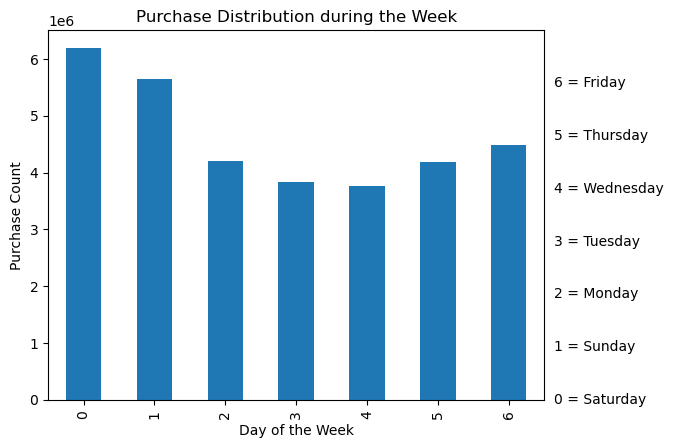

In [461]:
# Create a bar chart
orders_during_the_week_plot = df_final_table['order_day_of_week'].value_counts().sort_index().plot.bar()

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Purchase Count')
plt.title('Purchase Distribution during the Week')

# Define a legend with labels for days of the week
days_of_week_legend = [
    '0 = Saturday', '1 = Sunday', '2 = Monday', '3 = Tuesday', '4 = Wednesday', '5 = Thursday', '6 = Friday']

# Create a custom legend using text annotations
legend_x_position = 1.02  # Adjust the x-coordinate for proper placement
for idx, label in enumerate(days_of_week_legend):
    plt.text(legend_x_position, idx / len(days_of_week_legend), label, transform=orders_during_the_week_plot.transAxes, fontsize=10, va='center')

# Remove the default legend
orders_during_the_week_plot.legend().set_visible(False)

# Export the bar chart
output_filepath = os.path.join(path_2, 'Q1_orders_during_the_week_plot.png')
orders_during_the_week_plot.figure.savefig(output_filepath, bbox_inches='tight')



In [462]:
# create the table for excel 
orders_during_the_week = df_final_table['order_day_of_week'].value_counts().sort_index()

In [463]:
orders_during_the_week.to_clipboard()

#### Q1_orders_during_the_day.png

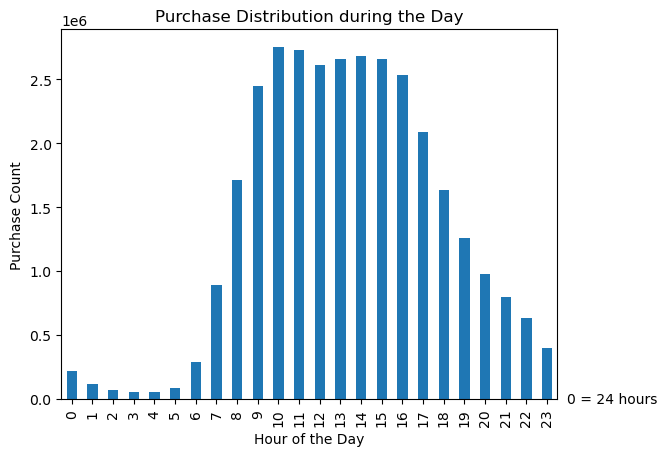

In [464]:
# create a bar chart
orders_during_the_day=df_final_table['order_hour_of_day'].value_counts().sort_index().plot.bar()

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Purchase Count')
plt.title('Purchase Distribution during the Day')

# Display the legend
plt.legend(title='Legend')

# Define a legend with labels for hours of the day
hour_of_day_legend = [
    '0 = 24 hours']

# Create a custom legend using text annotations
legend_x_position = 1.02  # Adjust the x-coordinate for proper placement
for idx, label in enumerate(hour_of_day_legend):
    plt.text(legend_x_position, idx / len(hour_of_day_legend), label, transform=orders_during_the_day.transAxes, fontsize=10, va='center')
    
# Remove the default legend
plt.legend().set_visible(False)

# Export the bar chart
orders_during_the_day.figure.savefig(os.path.join(path_2,'Q1_orders_during_the_day.png'))

In [465]:
# create a tabel
orders_during_the_day=df_final_table['order_hour_of_day'].value_counts().sort_index()

In [466]:
orders_during_the_day.to_clipboard()

#### Q1_gender_order_during_the_week_plot.png

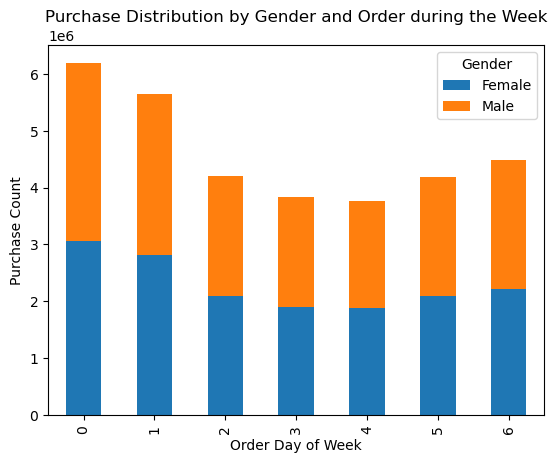

In [467]:
# Calculate counts of purchases for each combination of gender and order during the week
gender_order_during_the_week_plot = df_final_table.groupby(['order_day_of_week', 'gender']).size().unstack(fill_value=0)

# Create a bar chart
fig, ax = plt.subplots()  # Create a Figure and an AxesSubplot
gender_order_during_the_week_plot.plot(kind='bar', stacked=True, ax=ax)

# Add labels and title
ax.set_xlabel('Order Day of Week')
ax.set_ylabel('Purchase Count')
ax.set_title('Purchase Distribution by Gender and Order during the Week')

# Adjust the placement of the legend
plt.legend(title='Gender', loc='upper right')

# Save the bar chart
plt.savefig(os.path.join(path_2, 'Q1_gender_order_during_the_week_plot.png'))


In [468]:
# create a tabel
gender_order_during_the_week = df_final_table.groupby(['order_day_of_week', 'gender']).size()

In [469]:
gender_order_during_the_week.to_clipboard()

#### Tabel ordering Time vs department

In [470]:
# Gruppieren nach Abteilung und Uhrzeit und zählen die Bestellungen
department_order_counts = df_final_table.groupby(['department', 'order_hour_of_day']).size().reset_index(name='order_count')

In [471]:
department_order_counts

,department,order_hour_of_day,order_count
0,alcohol,0,501
1,alcohol,1,318
2,alcohol,2,255
3,alcohol,3,193
4,alcohol,4,198
...,...,...,...
499,snacks,19,108897
500,snacks,20,82165
501,snacks,21,64850
502,snacks,22,50995


In [472]:
# Define time categories (e.g., 6 categories)
time_categories = ['Night', 'Early Morning', 'Morning', 'Midday', 'Afternoon', 'Evening']

# Define the corresponding time ranges (adjust these as needed)
time_ranges = [(0, 3), (4, 6), (7, 9), (10, 14), (15, 18), (19, 23)]

# Create a new column for the time category based on 'order_hour_of_day'
df_final_table['time_category'] = pd.cut(df_final_table['order_hour_of_day'], bins=[range[0] for range in time_ranges] + [time_ranges[-1][1]], labels=time_categories, right=False)

# Group by time category and department, and count the orders in each group
department_order_counts = df_final_table.groupby(['time_category', 'department']).size().reset_index(name='order_count')

# Find the department with the most orders in each time category
max_orders_by_time_category = department_order_counts.groupby('time_category')['order_count'].idxmax()
most_ordered_departments = department_order_counts.loc[max_orders_by_time_category]

print("Department Ordered the Most in Each Time Category:")
print(most_ordered_departments)

Department Ordered the Most in Each Time Category:
     time_category department  order_count
19           Night    produce       137594
40   Early Morning    produce       129262
61         Morning    produce      1489764
82          Midday    produce      3923591
103      Afternoon    produce      2564814
124        Evening    produce      1092337


In [473]:
most_ordered_departments.to_clipboard()

In [474]:
# Create a new column for the time category based on 'order_hour_of_day'
df_final_table['time_category'] = pd.cut(df_final_table['order_hour_of_day'], bins=[range[0] for range in time_ranges] + [time_ranges[-1][1]], labels=time_categories, right=False)

# Group by time category and department, and count the orders in each group
department_order_counts = df_final_table.groupby(['time_category', 'department']).size().reset_index(name='order_count')

# Find the top 3 departments ordered the most in each time category
top_departments_by_time_category = department_order_counts.groupby('time_category').apply(lambda x: x.nlargest(3, 'order_count')).reset_index(drop=True)

print("Top 3 Departments Ordered the Most in Each Time Category:")
print(top_departments_by_time_category)

Top 3 Departments Ordered the Most in Each Time Category:
    time_category  department  order_count
0           Night     produce       137594
1           Night  dairy eggs        71072
2           Night   beverages        38295
3   Early Morning     produce       129262
4   Early Morning  dairy eggs        73786
5   Early Morning   beverages        35026
6         Morning     produce      1489764
7         Morning  dairy eggs       892930
8         Morning      snacks       449584
9          Midday     produce      3923591
10         Midday  dairy eggs      2218463
11         Midday      snacks      1212658
12      Afternoon     produce      2564814
13      Afternoon  dairy eggs      1458941
14      Afternoon      snacks       782872
15        Evening     produce      1092337
16        Evening  dairy eggs       609844
17        Evening      snacks       306907


In [475]:
top_departments_by_time_category.to_clipboard()

## Simplifying Strategies: Utilizing Price Range Groups to Enhance Instacart Marketing and Sales


#### Chart Q3_price_range_flag.png

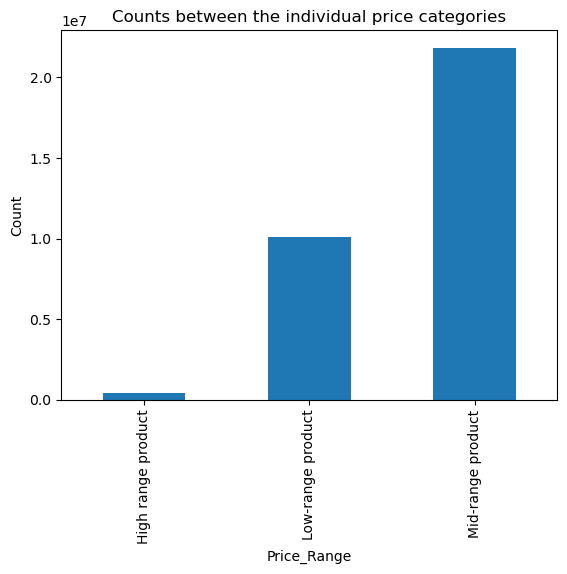

In [476]:
# Calculating the relationships between the individual price categories
price_categories=df_final_table['price_range_flag'].value_counts().sort_index().plot.bar()

# Create a bar chart
price_categories.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Price_Range')
plt.ylabel('Count')
plt.title('Counts between the individual price categories')

# Display the plot
plt.savefig(output_filepath, bbox_inches='tight')

# Export the bar chart
price_categories.figure.savefig(os.path.join(path_2,'Q3_price_range_flag.png'))

In [477]:
# Columns Grouped by 'price_range_flag' and perform aggregations
price_range_categories = df_final_table.groupby('price_range_flag').agg({
    'order_id': 'count',
    'order_number': 'mean',
    'product_id': ['count', 'nunique'],  # Calculate count and unique
    'prices': 'mean'
})

In [478]:
# view price_range_categories table
price_range_categories


order_id order_number product_id             prices
                       count         mean      count nunique       mean
price_range_flag                                                       
High range product    412498    15.857337     412498     545  20.609849
Low-range product   10071045    17.144298   10071045   16292   3.024137
Mid-range product   21835338    17.184302   21835338   32823   9.759697

In [479]:
# copy price_range_categories table
price_range_categories.to_clipboard()

In [480]:
loyalty_flag = df_final_table.groupby('loyalty_flag').agg({
    'order_id': 'count',
    'order_number': 'mean',
    'user_id': 'nunique',  # Calculate count of unique products
    'prices': 'mean',
    'days_since_prior_order': 'mean',
})

In [481]:
loyalty_flag

,order_id,order_number,user_id,prices,days_since_prior_order
loyalty_flag,,,,,
Loyal customer,10267367,32.642487,16924,7.778212,6.026492
New customer,6212076,3.808350,110213,7.818328,17.966402
Regular customer,15839438,12.349996,76174,7.805468,12.151669


In [482]:
loyalty_flag.to_clipboard()

### tabel prices_range_department

In [483]:
# Generate a crosstab that presents departments categorized into three distinct price ranges
prices_range_departmnet = pd.crosstab(df_final_table['department'],df_final_table['price_range_flag'],dropna=False)

In [484]:
prices_range_departmnet

price_range_flag,High range product,Low-range product,Mid-range product
department,,,
alcohol,0,34878,118290
babies,0,125252,298468
bakery,0,287173,883937
beverages,0,841538,1831433
breakfast,0,217313,484273
bulk,0,1221,33124
canned goods,0,298171,769043
dairy eggs,0,1430025,3961102
deli,0,312472,737177


In [485]:
# copy price_range_categories table
prices_range_departmnet.to_clipboard()

### create a frequency order flag

In [486]:
# displays the pre-existing frequency label related to the customer's ordering habit
df_final_table['frequency_flag'].describe

<bound method NDFrame.describe of 0           Non-frequent customer
1           Non-frequent customer
2           Non-frequent customer
3           Non-frequent customer
4           Non-frequent customer
                    ...          
32318876        Frequent customer
32318877        Frequent customer
32318878        Frequent customer
32318879        Frequent customer
32318880         Regular customer
Name: frequency_flag, Length: 32318881, dtype: object>

In [487]:
# describes the main data in days_since_prior_order column
df_final_table['days_since_prior_order'].describe()

count    3.025115e+07
mean     1.109619e+01
std      8.774780e+00
min      0.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      1.500000e+01
max      3.000000e+01
Name: days_since_prior_order, dtype: float64

In [488]:
# if- statement to category individual freqency of days since order
def frequency_order_flag(row):
    
    if pd.isna(row['days_since_prior_order']): # inludes the NaN first orders
        return 'High_ordered product'
    elif row['days_since_prior_order'] <= 5:
        return 'High_ordered product'
    elif 5 < row['days_since_prior_order'] <= 15:
        return 'Mid_ordered product'
    elif row['days_since_prior_order'] > 15:
        return 'Low_ordered product'
    else:
        return 'not_ordered'

In [489]:
# add a new columne frequency_order_flag
df_final_table['frequency_order_flag'] = df_final_table.apply(frequency_order_flag, axis=1)

In [490]:
df_final_table.head()

,order_id,product_id,product_name,prices,department_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,...,median_prior_orders,frequency_flag,aisle_id,eval_set,region,high_spender_flag,age_group_flag,department,time_category,frequency_order_flag
0,2539329,196,Soda,9.0,7,1,2,8,NaN,1,...,20.5,Non-frequent customer,77,prior,South,high_spender,31-40,beverages,Morning,High_ordered product
1,2398795,196,Soda,9.0,7,2,3,7,15.0,1,...,20.5,Non-frequent customer,77,prior,South,high_spender,31-40,beverages,Morning,Mid_ordered product
2,473747,196,Soda,9.0,7,3,3,12,21.0,1,...,20.5,Non-frequent customer,77,prior,South,high_spender,31-40,beverages,Midday,Low_ordered product
3,2254736,196,Soda,9.0,7,4,4,7,29.0,1,...,20.5,Non-frequent customer,77,prior,South,high_spender,31-40,beverages,Morning,Low_ordered product
4,431534,196,Soda,9.0,7,5,4,15,28.0,1,...,20.5,Non-frequent customer,77,prior,South,high_spender,31-40,beverages,Afternoon,Low_ordered product


In [491]:
df_final_table['frequency_order_flag'].value_counts(dropna = False)

Mid_ordered product     14223711
High_ordered product    10984701
Low_ordered product      7110469
Name: frequency_order_flag, dtype: int64

In [492]:
# cross table for freqency of order product
crosstab_freqency_order_flag = pd.crosstab(df_final_table['frequency_order_flag'], df_final_table['department'],dropna=False)

In [493]:
crosstab_freqency_order_flag.T

frequency_order_flag,High_ordered product,Low_ordered product,Mid_ordered product
department,,,
alcohol,65695,31714,55759
babies,158104,75591,190025
bakery,398789,257295,515026
beverages,922064,589850,1161057
breakfast,227148,156580,317858
bulk,12292,6256,15797
canned goods,343618,255056,468540
dairy eggs,1818680,1156321,2416126
deli,344949,238826,465874


In [494]:
crosstab_freqency_order_flag.T.to_clipboard()

## Exposing Best-Performing Product Categories to Supercharge Marketing and Sales at Instacart

#### Chart Q4_Order_in_categories.png

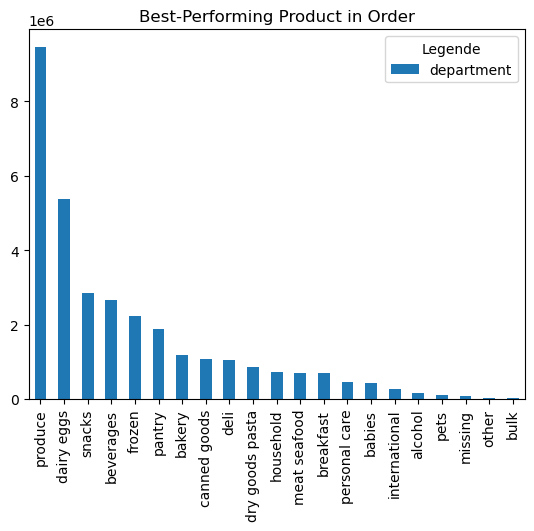

In [495]:
# Create a bar chart
department_bar_chart = df_final_table['department'].value_counts().plot.bar()
plt.title('Best-Performing Product in Order')

# Add labels and title
ax.set_xlabel('Order Day of Week')
ax.set_ylabel('Purchase Count')
ax.set_title('Purchase Distribution by Gender and Order during the Week')

# Adjust the placement of the legend
plt.legend(title='Legende', loc='upper right')

# Export the bar chart
department_bar_chart.figure.savefig(os.path.join(path_2,'Q4_Order_in_Categories.png'), bbox_inches='tight')

In [496]:
# Aggregate the max, mean, and min of the orders from the categories

crosstab_orders_categories = df_final_table.groupby('department').agg({'order_number':['count'] ,'age':['mean'],'prices':['mean']})

In [497]:
crosstab_orders_categories

,order_number,age,prices
,count,mean,mean
department,,,
alcohol,153168,48.915994,8.157353
babies,423720,49.301796,7.639133
bakery,1171110,49.457158,7.856861
beverages,2672971,49.601670,7.701382
breakfast,701586,49.352392,8.041161
bulk,34345,49.342117,8.361299
canned goods,1067214,49.412648,7.542226
dairy eggs,5391127,49.405312,8.335443


In [498]:
crosstab_orders_categories.to_clipboard()

#### table 3 top_10_rows

In [499]:
df_department

,Unnamed: 0,0
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [500]:
# create a subtabel with all products with form produce
## products_in_department_4 = df_final_table[df_final_table['department_id'] == 4]['product_name']
subtable_department_4 = df_final_table[df_final_table['department_id'] == 4]

In [501]:
# Aggregating the new subtable
crossstab_best_product = subtable_department_4.groupby('product_name').agg({'order_number':['count'],'prices':['mean'], 'days_since_prior_order':['mean']})

In [502]:
crossstab_best_product.to_clipboard()

In [503]:
# extract the first 10 rows from the aggregation result
top_10_rows = crossstab_best_product.nlargest(10, ('order_number', 'count'))

In [504]:
#show the result
top_10_rows

,order_number,prices,days_since_prior_order
,count,mean,mean
product_name,,,
Banana,472350,12.3,10.888373
Bag of Organic Bananas,378750,10.3,10.057435
Organic Strawberries,264375,7.3,10.031844
Organic Baby Spinach,241700,8.2,11.199182
Organic Hass Avocado,213460,4.0,10.204543
Organic Avocado,176738,6.3,11.199203
Large Lemon,152642,14.0,11.582432
Strawberries,141495,1.3,11.166665


In [505]:
# copy the result for the excel analysis
top_10_rows.to_clipboard()

In [506]:
# Define criteria for loyal customers (e.g., ordering frequency)
loyal_customer_criteria = {'frequency_order_flag': 'High_ordered product'}

# Calculate the frequency of banana orders for loyal customers
loyal_customers = df_final_table[df_final_table['frequency_order_flag'] <= loyal_customer_criteria['frequency_order_flag']]
banana_orders_by_loyal_customers = loyal_customers[loyal_customers['product_name'] == 'Bananas']

# Calculate the average time between banana orders for loyal customers
average_time_between_orders = banana_orders_by_loyal_customers['days_since_prior_order'].mean()

print(f"Loyal customers order bananas every {average_time_between_orders:.2f} days on average.")

Loyal customers order bananas every 3.29 days on average.


## Navigating Brand Loyalty: Analyzing User Return Patterns on Instacart

#### Chart Q5_Order_Frequency.png

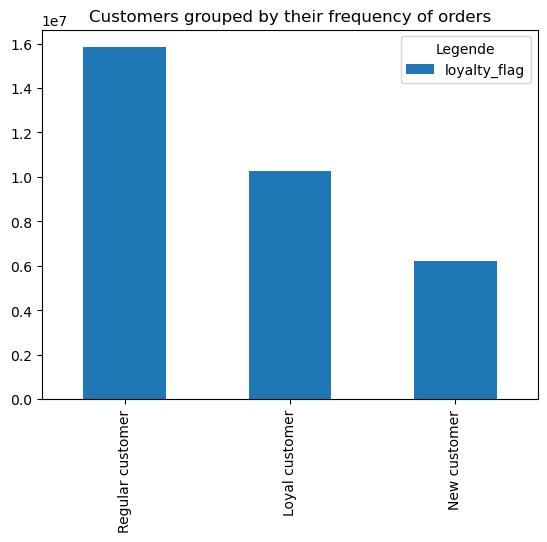

In [507]:
# Create a bar chart
loyalty_bar_chart = df_final_table['loyalty_flag'].value_counts().plot.bar()
plt.title('Customers grouped by their frequency of orders')

# Add labels and title
ax.set_xlabel('Order_Frequency')
ax.set_ylabel('Purchase Count')
ax.set_title('Customers grouped by their frequency of orders')

# Adjust the placement of the legend
plt.legend(title='Legende', loc='upper right')

# Export the bar chart
loyalty_bar_chart.figure.savefig(os.path.join(path_2,'Q5_Order_Frequency.png'), bbox_inches='tight')

In [508]:
# Aggregate the max, mean, and min of the orders from the categories

crosstab_loyalty_categories = df_final_table.groupby('loyalty_flag').agg({'order_number':['count'] ,'max_order_flag':['mean'],'prices':['mean']})

In [509]:
crosstab_loyalty_categories

,order_number,max_order_flag,prices
,count,mean,mean
loyalty_flag,,,
Loyal customer,10267367,63.985352,7.778212
New customer,6212076,6.577594,7.818328
Regular customer,15839438,23.435679,7.805468


In [510]:
crosstab_loyalty_categories.to_clipboard()

In [511]:
# Create a crosstab to calculate the maximum order count for each department within each loyalty group
crosstab_loyalty_department = df_final_table.groupby(['loyalty_flag', 'department']).size().unstack(fill_value=0)

# Find the department with the maximum order count for each loyalty group
max_department_for_loyalty = crosstab_loyalty_department.idxmax()

print(max_department_for_loyalty)

department
alcohol            Regular customer
babies             Regular customer
bakery             Regular customer
beverages          Regular customer
breakfast          Regular customer
bulk               Regular customer
canned goods       Regular customer
dairy eggs         Regular customer
deli               Regular customer
dry goods pasta    Regular customer
frozen             Regular customer
household          Regular customer
international      Regular customer
meat seafood       Regular customer
missing            Regular customer
other              Regular customer
pantry             Regular customer
personal care      Regular customer
pets               Regular customer
produce            Regular customer
snacks             Regular customer
dtype: object


In [512]:
# Group by loyalty_flag and product_name, then aggregate
crosstab_orders = df_final_table.groupby(['loyalty_flag', 'product_name']).agg({
    'product_name': ['count'],
    'prices': ['mean']})

In [513]:
# Find the products with the maximum count in each loyalty category
max_products_for_loyalty = crosstab_orders.groupby(level='loyalty_flag').apply(lambda x: x[x[('product_name', 'count')]==x[('product_name', 'count')].max()])

In [514]:
max_products_for_loyalty

,,,product_name,prices
,,,count,mean
loyalty_flag,loyalty_flag,product_name,,
Loyal customer,Loyal customer,Banana,155195,12.3
New customer,New customer,Banana,84120,12.3
Regular customer,Regular customer,Banana,233035,12.3


In [515]:
max_products_for_loyalty.to_clipboard()

## Unveiling Regional Trends: Exploring Variations in Ordering Behavior among Instacart Customers


#### Chart Q6_Order_in_Regions.png

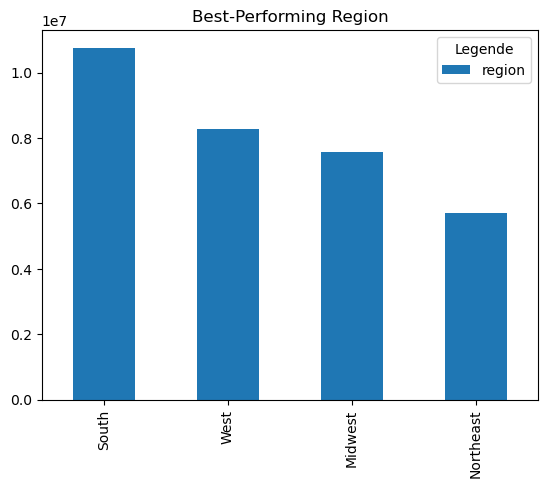

In [516]:
# Create a bar chart
department_bar_chart = df_final_table['region'].value_counts().plot.bar()
plt.title('Best-Performing Region')

# Add labels and title
ax.set_xlabel('Order Day of Week')
ax.set_ylabel('Purchase Count')

# Adjust the placement of the legend
plt.legend(title='Legende', loc='upper right')

# Export the bar chart
department_bar_chart.figure.savefig(os.path.join(path_2,'Q6_Order_in_Regions.png'), bbox_inches='tight')

In [517]:
# Check frequency
df_final_table['region'].value_counts(dropna = False)

South        10761250
West          8269880
Midwest       7578826
Northeast     5708925
Name: region, dtype: int64

In [518]:
# finding the amount of customers for each region
inhabit_per_region = df_final_table.groupby(['region']).agg({
    'user_id': ['nunique']})

In [519]:
inhabit_per_region

,user_id
,nunique
region,
Midwest,47887
Northeast,35884
South,67770
West,51770


In [520]:
inhabit_per_region.to_clipboard()

#### Chart Q6_Order_in_loyalty.png

In [521]:
# create a table grouped by the regions and aggregate mean from prices and max order, and count the loyalty_flag
regions_loyalty = df_final_table.groupby('region').agg({
    'loyalty_flag': 'count',
    'max_order_flag': 'mean',
    'prices': 'mean',
    'user_id': 'nunique'  # Count unique users
})

In [522]:
# Calculate counts of specific loyalty types within each region
loyalty_counts_by_region = df_final_table.groupby(['region', 'loyalty_flag']).size().unstack(fill_value=0)

In [523]:
loyalty_counts_by_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2370534,1465306,3742986
Northeast,1839364,1094193,2775368
South,3399106,2063885,5298259
West,2658363,1588692,4022825


In [524]:
loyalty_counts_by_region.to_clipboard()

In [525]:
# Flatten the MultiIndex of columns in regions_loyalty
regions_loyalty.columns = ['_'.join(col).strip() for col in regions_loyalty.columns.values]

In [526]:
# Reset index of regions_loyalty to remove the multi-level index
regions_loyalty.reset_index(inplace=True)

In [527]:
# Merge the loyalty counts with the original DataFrame
regions_loyalty = regions_loyalty.merge(loyalty_counts_by_region, on='region', how='left')

In [528]:
regions_loyalty

,region,l_o_y_a_l_t_y___f_l_a_g,m_a_x___o_r_d_e_r___f_l_a_g,p_r_i_c_e_s,u_s_e_r___i_d,Loyal customer,New customer,Regular customer
0,Midwest,7578826,32.611456,7.800184,47887,2370534,1465306,3742986
1,Northeast,5708925,33.231072,7.789823,35884,1839364,1094193,2775368
2,South,10761250,33.127040,7.803771,67770,3399106,2063885,5298259
3,West,8269880,33.334337,7.799138,51770,2658363,1588692,4022825


In [529]:
regions_loyalty.to_clipboard()

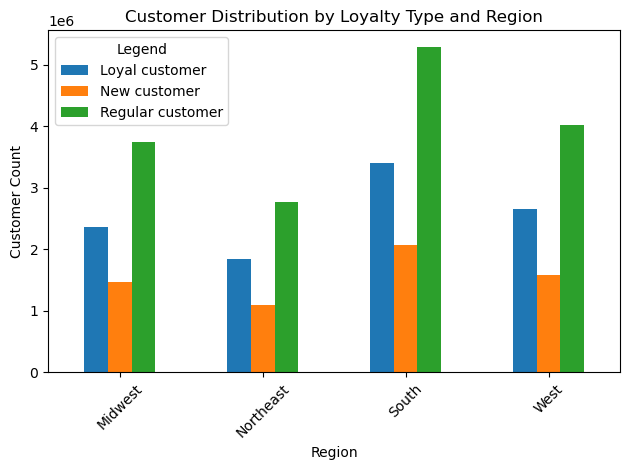

In [530]:
# Create a bar chart
loyalty_bar_chart = regions_loyalty.plot.bar(x='region', y=['Loyal customer', 'New customer', 'Regular customer'])

plt.title('Customer Distribution by Loyalty Type and Region')
plt.xlabel('Region')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)
plt.legend(title='Legend')
plt.tight_layout()

# Export the bar chart
loyalty_bar_chart.figure.savefig(os.path.join(path_2, 'Q6_Customer_Distribution.png'), bbox_inches='tight')


#### Chart 6 Q6_Customer_Distribution.png horizontal

In [531]:
# retrieve a cross table from department column and region
region_departments = pd.crosstab(df_final_table['department'],df_final_table['region'],dropna=False)

In [532]:
region_departments = region_departments.sort_values(by=['South'], ascending=True)

In [533]:
region_departments

region,Midwest,Northeast,South,West
department,,,,
bulk,8138,5750,11474,8983
other,8392,6560,12191,9030
missing,16517,12369,23178,17024
pets,22349,18592,31230,25484
alcohol,36108,26488,51403,39169
international,63705,46830,89098,69448
babies,98964,75120,143628,106008
personal care,105596,78694,150137,112522
breakfast,163270,123346,233743,181227


In [534]:
region_departments.to_clipboard()

Text(0.5, 1.0, 'Distribution of the departments across the regions')

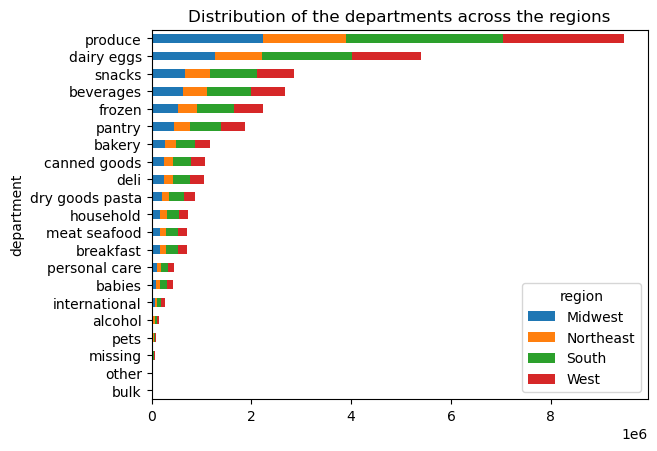

In [535]:
# Visualizing the result with a Bar Chart
region_departments = region_departments.plot.barh(stacked = True)
plt.title('Distribution of the departments across the regions')


In [536]:
# Export the bar chart
region_departments.figure.savefig(os.path.join(path_2, 'Q6_Customer_Distribution.png'), bbox_inches='tight')

#### Chart Q6_Departments_across_Regions.png vertical

In [537]:
# retrieve a cross table from department column and region
region_departments = pd.crosstab(df_final_table['department'],df_final_table['region'],dropna=False)

In [538]:
# order the crosstab by south
region_departments = region_departments.sort_values(by=['South'], ascending=True)

In [539]:
region_departments

region,Midwest,Northeast,South,West
department,,,,
bulk,8138,5750,11474,8983
other,8392,6560,12191,9030
missing,16517,12369,23178,17024
pets,22349,18592,31230,25484
alcohol,36108,26488,51403,39169
international,63705,46830,89098,69448
babies,98964,75120,143628,106008
personal care,105596,78694,150137,112522
breakfast,163270,123346,233743,181227


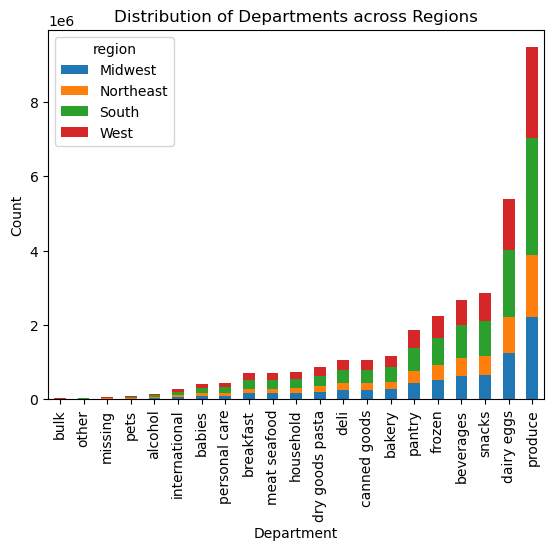

In [540]:
# Create a vertical stacked bar chart
fig, ax = plt.subplots()
ax = region_departments.plot(kind='bar', stacked=True, ax=ax)

# Add labels and title
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Distribution of Departments across Regions')

# Manually create the legend using patches
department_labels = region_departments.index
legend_patches = [mpatches.Patch(color=ax.get_children()[i].get_facecolor(), label=department_labels[i]) for i in range(len(department_labels))]

# Export the bar chart
plt.savefig(os.path.join(path_2, 'Q6_Departments_across_Regions.png'), bbox_inches='tight')


#### chart Q6_Family_Status_across_Regions.png

In [541]:
# retrieve a cross table from reordered and region
region_fam_status = pd.crosstab(df_final_table['fam_status'], df_final_table['region'], dropna=False)

In [542]:
region_fam_status

region,Midwest,Northeast,South,West
fam_status,,,,
divorced/widowed,644951,499952,918486,700215
living with parents and siblings,365834,267714,527981,385421
married,5312221,4026280,7539595,5819232
single,1255820,914979,1775188,1365012


In [543]:
region_fam_status.to_clipboard()

Text(0.5, 1.0, 'Distribution of the Family Status across the regions')

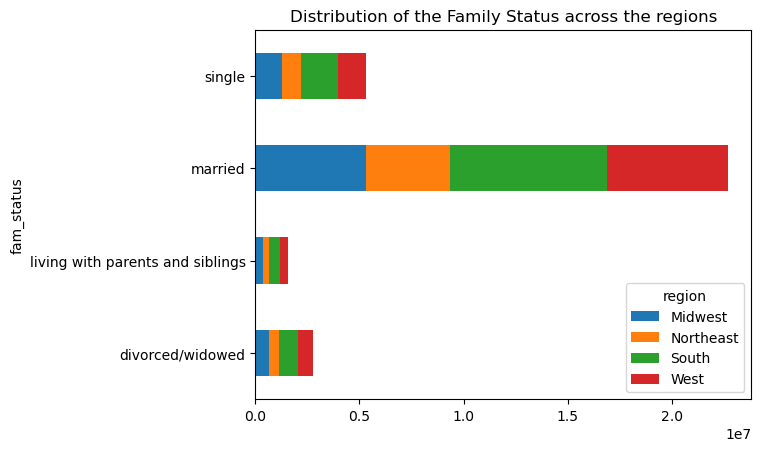

In [544]:
# Visualizing the result with a Bar Chart
region_fam_status = region_fam_status.plot.barh(stacked = True)
plt.title('Distribution of the Family Status across the regions')

In [545]:
# retrieve a cross table from reordered and region
region_fam_status = pd.crosstab(df_final_table['fam_status'], df_final_table['region'], dropna=False)

In [546]:
region_fam_status.to_clipboard()

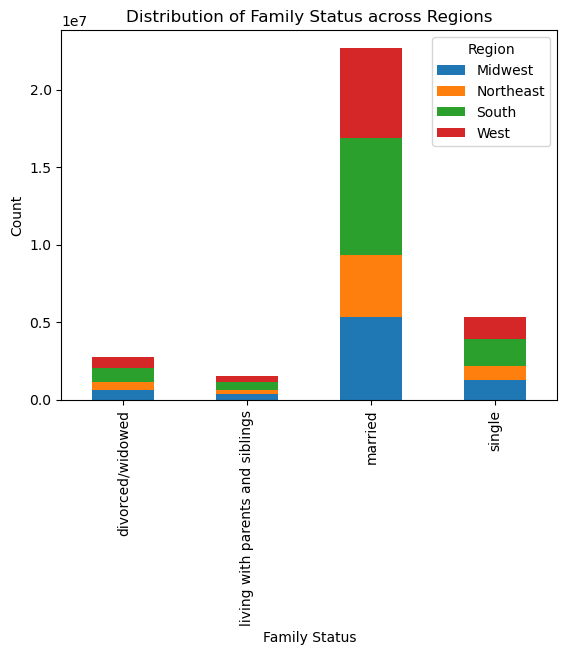

In [547]:
# Create a bar chart
fig, ax = plt.subplots()  # Create a figure
region_fam_status.plot(kind='bar', stacked=True, ax=ax)

# Customize labels and title
plt.xlabel('Family Status')
plt.ylabel('Count')
plt.title('Distribution of Family Status across Regions')
plt.legend(title='Region')

# Display the plot
plt.show()

In [548]:
fig.savefig(os.path.join(path_2, 'Q6_Family_Status_across_Regions.png'), bbox_inches='tight')

#### chart Q6_Busiest_Day_across_Regions.png

In [549]:
# retrieve a cross table 
order_day_region = pd.crosstab(df_final_table ['region'], df_final_table['busiest_day'],dropna=False)

In [550]:
order_day_region

busiest_day,Busiest day,Least busy,Regularly busy
region,,,
Midwest,1458777,885555,5234494
Northeast,1096144,664213,3948568
South,2050338,1254133,7456779
West,1592185,967180,5710515


In [551]:
order_day_region.to_clipboard()

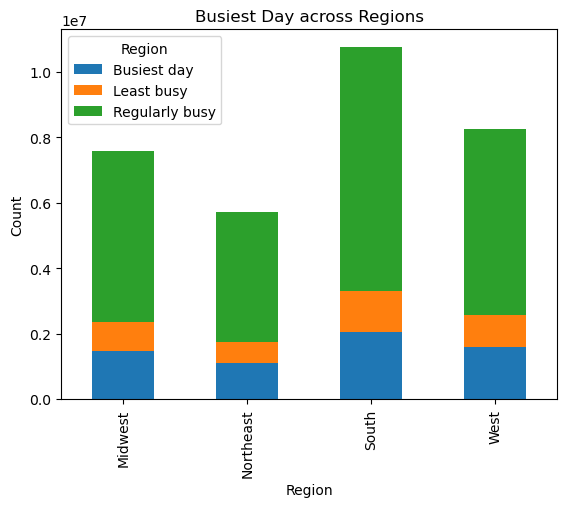

In [552]:
# Create a bar chart
fig, ax = plt.subplots()  # Create a figure
order_day_region.plot(kind='bar', stacked=True, ax=ax)

# Customize labels and title
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Busiest Day across Regions')
plt.legend(title='Region')

# Display the plot
plt.show()

In [553]:
fig.savefig(os.path.join(path_2, 'Q6_busiest_day_across_Regions_1.png'), bbox_inches='tight')

In [554]:
# retrieve a cross table 
order_day_region_2 = pd.crosstab(df_final_table ['region'], df_final_table['order_day_of_week'],dropna=False)

In [555]:
order_day_region_2.T

region,Midwest,Northeast,South,West
order_day_of_week,,,,
0,1458777,1096144,2050338,1592185
1,1316440,997130,1884386,1442423
2,988603,743716,1398965,1067254
3,891843,677214,1282871,975126
4,885555,664213,1254133,967180
5,980658,744427,1395784,1072974
6,1056950,786081,1494773,1152738


In [556]:
order_day_region_2.T.to_clipboard()

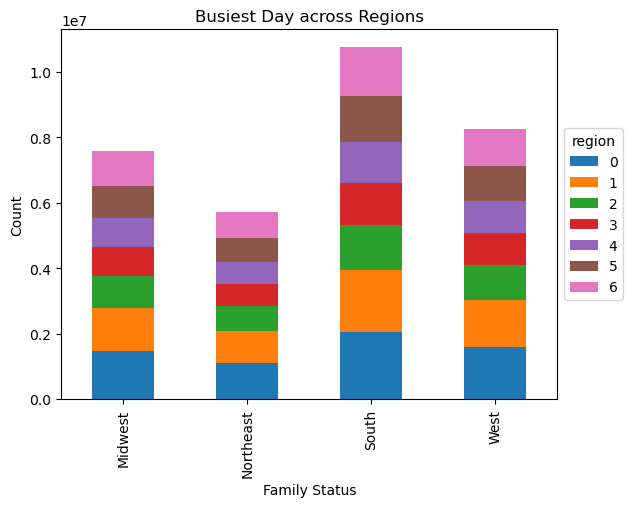

In [557]:
# Create a bar chart
fig, ax = plt.subplots()  # Create a figure
order_day_region_2.plot(kind='bar', stacked=True, ax=ax)

# Customize labels and title
plt.xlabel('Family Status')
plt.ylabel('Count')
plt.title('Busiest Day across Regions')
plt.legend(title='region',loc='center left', bbox_to_anchor=(1.0, 0.5))

# Display the plot
plt.show()

In [558]:
fig.savefig(os.path.join(path_2, 'Q6_busiest_day_across_Regions_2.png'), bbox_inches='tight')

## Age, Family, and Ordering Habits: Investigating Interrelationships on Instacart


#### Q7_region_fam_status.png

In [559]:
# Create a pivot table to calculate the sum of unique user_id for each combination of region and family status
region_fam_status = df_final_table.pivot_table(
    values='user_id',
    index='region',
    columns='fam_status',
    aggfunc='nunique', # uses the unique user_id
    fill_value=0  # Fill missing values with 0
)

In [560]:
region_fam_status

fam_status,divorced/widowed,living with parents and siblings,married,single
region,,,,
Midwest,4035,2270,33699,7883
Northeast,3104,1562,25265,5953
South,5807,3270,47570,11123
West,4446,2481,36337,8506


In [561]:
region_fam_status.to_clipboard()

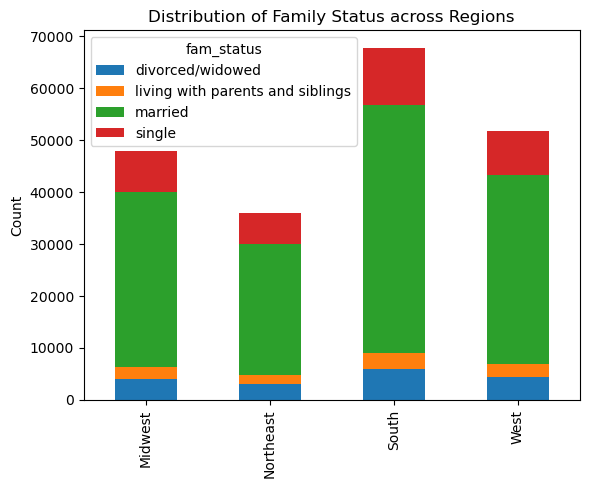

In [562]:
# Create a vertical stacked bar chart
fig, ax = plt.subplots()
ax = region_fam_status.plot(kind='bar', stacked=True, ax=ax)

# Add labels and title
plt.xlabel('')
plt.ylabel('Count')
plt.title('Distribution of Family Status across Regions')

# Export the bar chart
plt.savefig(os.path.join(path_2, 'Q7_region_fam_status.png'), bbox_inches='tight')

#### Q7_children_fam_status.png

In [563]:
# Create a pivot table to calculate the sum of unique user_id for each combination of children and family status
region_fam_status = df_final_table.pivot_table(
    values='user_id',
    index='n_dependants',
    columns='fam_status',
    aggfunc='nunique', # uses the unique user_id
    fill_value=0  # Fill missing values with 0
)

In [564]:
region_fam_status

fam_status,divorced/widowed,living with parents and siblings,married,single
n_dependants,,,,
0,17392,0,0,33465
1,0,3185,47629,0
2,0,3221,47523,0
3,0,3177,47719,0


In [565]:
region_fam_status.to_clipboard()

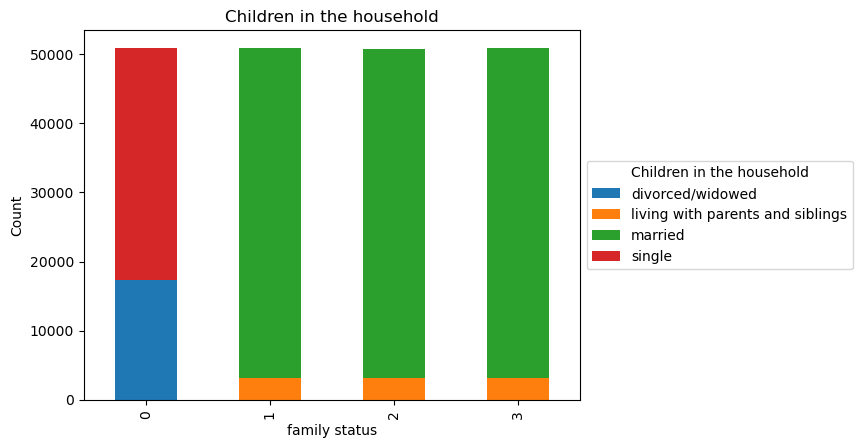

In [566]:
# Create a vertical stacked bar chart
fig, ax = plt.subplots()
ax = region_fam_status.plot(kind='bar', stacked=True, ax=ax)

# Add labels and title
plt.xlabel('family status')
plt.ylabel('Count')
plt.title('Children in the household')
plt.legend(title='Children in the household',loc='center left', bbox_to_anchor=(1.0, 0.5))


# Export the bar chart
plt.savefig(os.path.join(path_2, 'Q7_children_fam_status.png'), bbox_inches='tight')

#### Q7_children_fam_status.png

In [567]:
df_final_table.groupby('age_group_flag').agg({'loyalty_flag':['count'],'order_number':['count'],  'prices':['mean']})

,loyalty_flag,order_number,prices
,count,count,mean
age_group_flag,,,
18-30,6074260,6074260,7.791446
31-40,5061671,5061671,7.796242
41-50,5096083,5096083,7.807259
51-60,5049778,5049778,7.793921
61-70,4974674,4974674,7.807175
71+,6062415,6062415,7.800946


#### Q7_Age Groups and Loyalty.png

In [568]:
# retrieve a cross table 
age_group_loyalty = pd.crosstab(df_final_table['age_group_flag'] ,
                                         df_final_table ['loyalty_flag'],
                                         dropna=False)

In [569]:
age_group_loyalty.to_clipboard()

In [570]:
age_group_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
age_group_flag,,,
18-30,1910936,1167942,2995382
31-40,1603683,960194,2497794
41-50,1629974,973769,2492340
51-60,1614317,978242,2457219
61-70,1583461,968870,2422343
71+,1924996,1163059,2974360


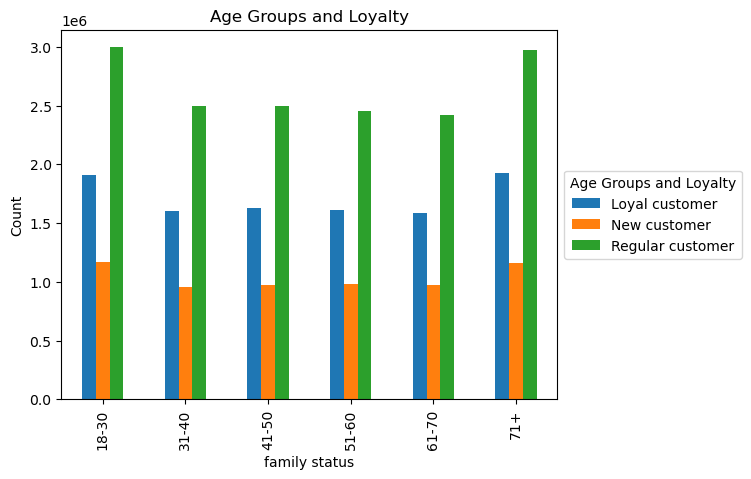

In [571]:
# Create a vertical stacked bar chart
fig, ax = plt.subplots()
ax = age_group_loyalty.plot(kind='bar', ax=ax)

# Add labels and title
plt.xlabel('family status')
plt.ylabel('Count')
plt.title('Age Groups and Loyalty')
plt.legend(title='Age Groups and Loyalty',loc='center left', bbox_to_anchor=(1.0, 0.5))


# Export the bar chart
plt.savefig(os.path.join(path_2, 'Q7_Age Groups and Loyalty.png'), bbox_inches='tight')

#### Q7_age_loyalty.png

In [572]:
age_group_order_number = df_final_table.groupby('age_group_flag').agg({'order_id':['count'],
                                             'days_since_prior_order':['mean'],  
                                             'prices':['mean']})

In [573]:
age_group_order_number 

,order_id,days_since_prior_order,prices
,count,mean,mean
age_group_flag,,,
18-30,6074260,11.107533,7.791446
31-40,5061671,11.092069,7.796242
41-50,5096083,11.089143,7.807259
51-60,5049778,11.119352,7.793921
61-70,4974674,11.087666,7.807175
71+,6062415,11.081880,7.800946


In [574]:
age_group_order_number = df_final_table.groupby(['loyalty_flag','age_group_flag']).agg({'order_id':['count'],
                                                                                        'days_since_prior_order':['mean'],  
                                                                                         'prices':['mean']})

In [575]:
age_group_order_number 

order_id days_since_prior_order    prices
                                   count                   mean      mean
loyalty_flag     age_group_flag                                          
Loyal customer   18-30           1910936               6.044586  7.769802
                 31-40           1603683               6.003009  7.773374
                 41-50           1629974               6.020379  7.787015
                 51-60           1614317               6.063280  7.772979
                 61-70           1583461               5.993766  7.787635
                 71+             1924996               6.029340  7.779773
New customer     18-30           1167942              17.944393  7.813531
                 31-40            960194              17.930333  7.816070
                 41-50            973769              18.065591  7.819134
                 51-60            978242              17.976729  7.814684
                 61-70            968870              17.991017  7.819419
                 71+             1163059              17.906102  7.826489
Regular customer 18-30           2995382              12.129016  7.796644
                 31-40           2497794              12.187922  7.803302
                 41-50           2492340              12.148725  7.815859
                 51-60           2457219              12.178397  7.799413
                 61-70           2422343              12.130867  7.815051
                 71+             2974360              12.141371  7.804662

In [576]:
age_group_order_number.to_clipboard()

In [577]:
# Check customer loyalty
age_loyalty = pd.crosstab(df_final_table['loyalty_flag'],df_final_table['age_group_flag'],dropna=False)

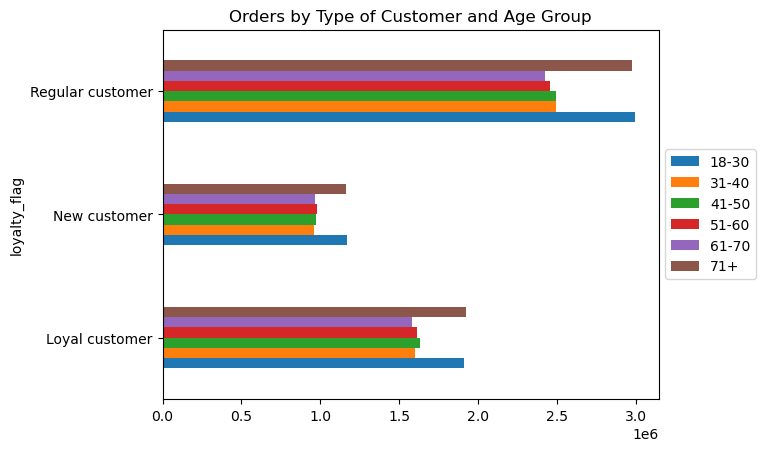

In [578]:
age_loyalty  = age_loyalty .plot.barh()
plt.title('Orders by Type of Customer and Age Group')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [579]:
# Check customer spending
loyalty_spending = pd.crosstab(df_final_table['loyalty_flag'],df_final_table['spending_flag'],dropna=False)

In [580]:
loyalty_spending

spending_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,13896,10253471
New customer,58232,6153844
Regular customer,47187,15792251


In [581]:
loyalty_spending_2 = df_final_table.groupby(['loyalty_flag','region']).agg({'spending_flag':['count']})

In [582]:
loyalty_spending_2.to_clipboard()

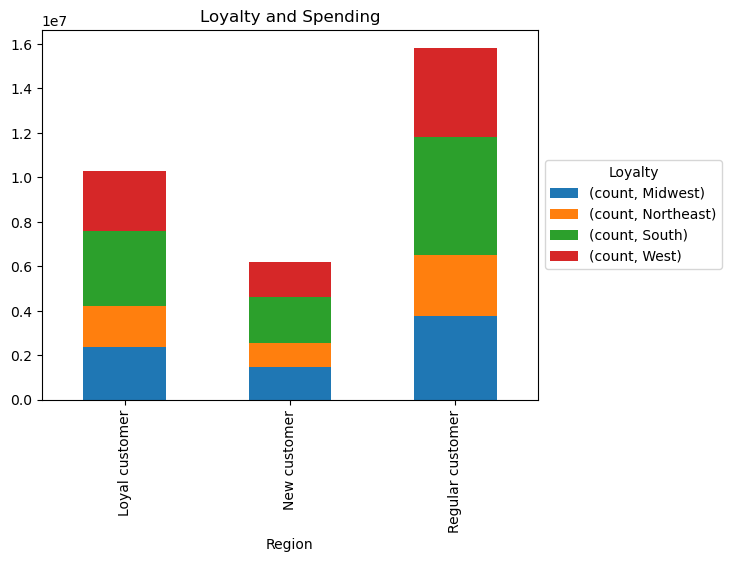

In [583]:
# Pivot the DataFrame
loyalty_spending_pivot = loyalty_spending_2.pivot_table(
    values='spending_flag',
    index='loyalty_flag',
    columns='region',
    aggfunc='sum',
    fill_value=0
)

# Create a vertical stacked bar chart
fig, ax = plt.subplots()
loyalty_spending_pivot.plot(kind='bar', stacked=True, ax=ax)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('')
plt.title('Loyalty and Spending')
plt.legend(title='Loyalty', loc='center left', bbox_to_anchor=(1.0, 0.5))

# Export the bar chart
plt.savefig(os.path.join(path_2, 'Q7_Loyalty_and_Spending.png'), bbox_inches='tight')


### getting started

## Spending Habits: Frequency, Income, Age Group, Department

#### Table Spending_flag and frequency_flag

In [584]:
# Create a pivot table to calculate the sum of days_prior_order for each combination of region and family status
df_final_table.groupby(['spending_flag','frequency_flag']).agg({'prices':['mean'],'days_since_prior_order':['mean'],  'order_id':['mean']})

prices days_since_prior_order  \
                                          mean                   mean   
spending_flag frequency_flag                                            
High spender  Frequent customer      10.563525               8.094158   
              Non-frequent customer  10.626943              24.479732   
              Regular customer       10.567317              15.692161   
Low spender   Frequent customer       7.789046               7.877383   
              Non-frequent customer   7.782266              23.295757   
              Regular customer        7.792128              15.555610   

                                         order_id  
                                             mean  
spending_flag frequency_flag                       
High spender  Frequent customer      1.715029e+06  
              Non-frequent customer  1.696401e+06  
              Regular customer       1.700124e+06  
Low spender   Frequent customer      1.710417e+06  
              Non-frequent customer  1.711743e+06  
              Regular customer       1.711396e+06

In [585]:
frequency_table = df_final_table.groupby(['spending_flag','frequency_flag']).agg({'prices':['mean'],'days_since_prior_order':['mean'],  'order_id':['mean']})

In [586]:
frequency_table

prices days_since_prior_order  \
                                          mean                   mean   
spending_flag frequency_flag                                            
High spender  Frequent customer      10.563525               8.094158   
              Non-frequent customer  10.626943              24.479732   
              Regular customer       10.567317              15.692161   
Low spender   Frequent customer       7.789046               7.877383   
              Non-frequent customer   7.782266              23.295757   
              Regular customer        7.792128              15.555610   

                                         order_id  
                                             mean  
spending_flag frequency_flag                       
High spender  Frequent customer      1.715029e+06  
              Non-frequent customer  1.696401e+06  
              Regular customer       1.700124e+06  
Low spender   Frequent customer      1.710417e+06  
              Non-frequent customer  1.711743e+06  
              Regular customer       1.711396e+06

In [587]:
frequency_table.to_clipboard()

#### Table product and frequency

In [588]:
# Create a pivot table to calculate frequency
df_final_table.groupby(['frequency_order_flag','frequency_flag']).agg({'prices':['mean'],'days_since_prior_order':['mean'],  'order_id':['mean']})

prices days_since_prior_order  \
                                                mean                   mean   
frequency_order_flag frequency_flag                                           
High_ordered product Frequent customer      7.796925               3.176327   
                     Non-frequent customer  7.803113               2.979179   
                     Regular customer       7.803400               3.333119   
Low_ordered product  Frequent customer      7.825725              23.570575   
                     Non-frequent customer  7.799882              27.437664   
                     Regular customer       7.807762              24.126940   
Mid_ordered product  Frequent customer      7.790152               8.498635   
                     Non-frequent customer  7.831148              10.574888   
                     Regular customer       7.803150              10.663529   

                                                order_id  
                                                    mean  
frequency_order_flag frequency_flag                       
High_ordered product Frequent customer      1.711933e+06  
                     Non-frequent customer  1.713955e+06  
                     Regular customer       1.705840e+06  
Low_ordered product  Frequent customer      1.709582e+06  
                     Non-frequent customer  1.713095e+06  
                     Regular customer       1.713535e+06  
Mid_ordered product  Frequent customer      1.709287e+06  
                     Non-frequent customer  1.702445e+06  
                     Regular customer       1.711574e+06

In [589]:
frequency_table_2 = df_final_table.groupby(['frequency_order_flag','frequency_flag']).agg({'prices':['mean'],'days_since_prior_order':['mean'],  'order_id':['mean']})

In [590]:
frequency_table_2.T.to_clipboard()

In [591]:
# Create a table to calculate frequency
frequency_table_3 = df_final_table.groupby(['frequency_order_flag','frequency_flag', 'department']).agg({'prices':['mean'],'days_since_prior_order':['mean'],  'order_id':['mean']})

In [592]:
frequency_table_3.to_clipboard()

In [593]:
# Find the top 3 departments within each combination of 'frequency_order_flag' and 'frequency_flag' based on max price
top_3_departments = df_final_table.groupby(['frequency_order_flag', 'frequency_flag', 'department'])['prices'].max() \
    .groupby(['frequency_order_flag', 'frequency_flag'], group_keys=False).nlargest(3).reset_index()

# Rename 'frequency_flag' to 'new_name' (you can replace 'new_name' with your desired column name)
top_3_departments.rename(columns={'frequency_flag': 'requency_flag_table'}, inplace=True)

In [594]:
top_3_departments.to_clipboard()

In [595]:
# Group by 'department' and calculate the mean prices
department_table = df_final_table.groupby(['department'])['prices'].mean().reset_index()

# Get the top 3 departments based on mean prices
top_3_departments = department_table.nlargest(3, 'prices')

In [596]:
top_3_departments

,department,prices
13,meat seafood,16.295029
14,missing,8.661614
5,bulk,8.361299


#### Table spending flag compared income group

In [597]:
df_final_table['spending_flag'].value_counts(dropna = False)

Low spender     32199566
High spender      119315
Name: spending_flag, dtype: int64

In [598]:
df_final_table.head()

,order_id,product_id,product_name,prices,department_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,...,median_prior_orders,frequency_flag,aisle_id,eval_set,region,high_spender_flag,age_group_flag,department,time_category,frequency_order_flag
0,2539329,196,Soda,9.0,7,1,2,8,NaN,1,...,20.5,Non-frequent customer,77,prior,South,high_spender,31-40,beverages,Morning,High_ordered product
1,2398795,196,Soda,9.0,7,2,3,7,15.0,1,...,20.5,Non-frequent customer,77,prior,South,high_spender,31-40,beverages,Morning,Mid_ordered product
2,473747,196,Soda,9.0,7,3,3,12,21.0,1,...,20.5,Non-frequent customer,77,prior,South,high_spender,31-40,beverages,Midday,Low_ordered product
3,2254736,196,Soda,9.0,7,4,4,7,29.0,1,...,20.5,Non-frequent customer,77,prior,South,high_spender,31-40,beverages,Morning,Low_ordered product
4,431534,196,Soda,9.0,7,5,4,15,28.0,1,...,20.5,Non-frequent customer,77,prior,South,high_spender,31-40,beverages,Afternoon,Low_ordered product


In [599]:
df_final_table.groupby(['spending_flag', 'region']).agg({'prices': 'mean'})


prices
spending_flag region              
High spender  Midwest    10.562230
              Northeast  10.583265
              South      10.592045
              West       10.579700
Low spender   Midwest     7.789492
              Northeast   7.780694
              South       7.793275
              West        7.788628

In [600]:
# Create an income flag for the three categories
df_final_table.loc[df_final_table['income'] < 35000, 'income_group'] = 'low_income'
df_final_table.loc[(df_final_table['income'] >= 35000) & (df_final_table['income'] < 150000), 'income_group'] = 'middle_income'
df_final_table.loc[df_final_table['income'] >= 150000, 'income_group'] = 'high_income'

In [601]:
spending_flag_income_group = df_final_table.groupby(['spending_flag','region', 'income_group']).agg({'income': 'mean'})

In [602]:
spending_flag_income_group

income
spending_flag region    income_group                
High spender  Midwest   high_income    159081.077425
                        middle_income   94686.684873
              Northeast high_income    169520.053024
                        middle_income   94078.221737
              South     high_income    159443.390979
                        middle_income   96789.235967
              West      high_income    159313.117411
                        middle_income   95716.354863
Low spender   Midwest   high_income    172299.703444
                        low_income      31527.564653
                        middle_income   91862.666140
              Northeast high_income    169517.716921
                        low_income      31629.357642
                        middle_income   91766.828782
              South     high_income    169765.494266
                        low_income      31562.802063
                        middle_income   91096.492027
              West      high_income    169502.595614
                        low_income      31733.001352
                        middle_income   91286.720954

In [603]:
spending_flag_income_group.to_clipboard()

#### Table Age Group and Income

In [604]:
# Create a table to calculate income in age groups
table_income_age_group = df_final_table.groupby(['age_group_flag','income_group']).agg({'income':['mean'],'order_id': ['nunique']})

In [605]:
table_income_age_group

income order_id
                                       mean  nunique
age_group_flag income_group                         
18-30          high_income    220025.057102     5086
               low_income      31012.471939    33248
               middle_income   70952.946159   557446
31-40          high_income    224500.110674     4015
               low_income      30911.077464    26150
               middle_income   70770.769300   466110
41-50          high_income    171285.663480    85753
               low_income      32039.135077    15301
               middle_income  101464.574959   403392
51-60          high_income    167320.228481    90019
               low_income      32546.790342    14159
               middle_income  105111.887169   393727
61-70          high_income    168315.082812    91216
               low_income      32154.662889    13831
               middle_income  105454.628837   385783
71+            high_income    168694.188984   107767
               low_income      32313.838217    16755
               middle_income  105519.881788   476022

In [606]:
table_income_age_group.to_clipboard()

In [607]:
df_final_table['income_group'].value_counts(dropna = False)

middle_income    27328450
high_income       4051607
low_income         938824
Name: income_group, dtype: int64

In [608]:
# Define your filter criteria (for example, ages between 30 and 45)
filter_criteria_age_group = (df_final_table['age'] >= 18) & (df_final_table['age'] <= 30)

# Filter the rows based on the criteria
filtered_df = df_final_table[filter_criteria_age_group]

# Calculate the mean income for the filtered rows
mean_income = filtered_df['income'].mean()

In [609]:
# average income for age_group 18-30
mean_income

70522.03200744733

In [610]:
# Define your filter criteria
criteria1 = df_final_table['age'] <= 30  # Age is less than or equal to 30
criteria2 = df_final_table['income'] >= 140000  # Income is greater than or equal to 70000

# Apply aggregation function to calculate unique order_id count
criteria3 = df_final_table.groupby('order_id')['order_id'].transform('nunique') == 1

# Combine the criteria using the logical AND operator (&)
filtered_df = df_final_table[criteria1 & criteria2 & criteria3]

In [611]:
# Select specific columns from the filtered DataFrame
selected_columns = filtered_df[['age', 'income', 'order_id']]

In [612]:
selected_columns

,age,income,order_id
4534,30,150471,1678443
7559,24,303756,2769625
7560,24,303756,2514916
7561,24,303756,770503
7562,24,303756,1845467
...,...,...,...
32299071,20,181130,81985
32300691,27,172514,1130455
32301652,18,146071,1890480
32305284,24,167312,732092


In [613]:
# check the data for income in age group 18-30
selected_columns['income'].describe()

count     64774.000000
mean     212365.973601
std       72989.861574
min      140685.000000
25%      160217.000000
50%      176145.000000
75%      255957.000000
max      396364.000000
Name: income, dtype: float64

#### Table Income and Department

In [614]:
# Create a pivot table to calculate the mean order number
table_income_age_group = df_final_table.pivot_table(
    values='order_number',  # Column to calculate the mean on
    index='income_group',   # Rows in the pivot table
    columns='department',   # Columns in the pivot table
    aggfunc='mean'          # Aggregation function (mean)
)

In [615]:
table_income_age_group.T

income_group,high_income,low_income,middle_income
department,,,
alcohol,16.988458,12.745861,14.994424
babies,19.581541,16.689906,19.323460
bakery,17.785204,15.038197,17.145486
beverages,17.689588,16.252535,17.235917
breakfast,17.417557,16.792814,16.687978
bulk,19.076332,17.858407,20.497562
canned goods,16.399144,13.194604,16.207674
dairy eggs,17.838679,15.890303,17.701666
deli,16.665804,15.088230,16.501431


In [616]:
table_income_age_group.T.to_clipboard()

## Decoding Customer Profiles: Analyzing Varied Ordering Habits Including Order Value, Frequency, Product Preferences, and More


#### Table Frequency and Department

In [617]:
# Create a pivot table to calculate the mean days_since_prior_order
table_income_frequency = df_final_table.pivot_table(
    values='days_since_prior_order',  # Column to calculate the mean on
    index='income_group',   # Rows in the pivot table
    columns='department',   # Columns in the pivot table
    aggfunc='mean'          # Aggregation function (mean)
)

In [618]:
table_income_frequency.T

income_group,high_income,low_income,middle_income
department,,,
alcohol,9.818650,10.792839,10.426357
babies,9.813164,11.388590,10.005282
bakery,10.813022,11.977448,11.113448
beverages,10.813025,11.413609,11.048631
breakfast,11.006692,11.442494,11.320919
bulk,10.137960,10.909864,10.032872
canned goods,11.483661,13.111264,11.643966
dairy eggs,10.916494,11.527515,10.975396
deli,11.199308,11.840744,11.345424


In [619]:
table_income_frequency.T.to_clipboard()

#### Frequency for certain departments

In [620]:
# Filter the DataFrame to include only the 'Alcohol' department
alcohol_df = df_final_table[df_final_table['department'] == 'alcohol']

# Check if there are any records for the 'Alcohol' department
if not alcohol_df.empty:
    # Group by 'order_day_of_week' and count the orders
    day_counts = alcohol_df['order_day_of_week'].value_counts()

    # Find the day with the highest count (most orders)
    most_ordered_day = day_counts.idxmax()

    print("The most ordered day for the 'Alcohol' department is day", most_ordered_day)
else:
    print("There are no records for the 'Alcohol' department.")

The most ordered day for the 'Alcohol' department is day 5


In [621]:
# Filter the DataFrame to include only the 'Alcohol' department
babies_df = df_final_table[df_final_table['department'] == 'babies']

# Check if there are any records for the 'Alcohol' department
if not babies_df.empty:
    # Group by 'order_day_of_week' and count the orders
    day_counts = babies_df['order_day_of_week'].value_counts()

    # Find the day with the highest count (most orders)
    most_ordered_day = day_counts.idxmax()

    print("The most ordered day for the 'Babies' department is day", most_ordered_day)
else:
    print("There are no records for the 'Babies' department.")

The most ordered day for the 'Babies' department is day 0


In [622]:
# Filter the DataFrame to include only the 'Alcohol' department
produce_df = df_final_table[df_final_table['department'] == 'produce']

# Check if there are any records for the 'Alcohol' department
if not produce_df.empty:
    # Group by 'order_day_of_week' and count the orders
    day_counts = produce_df['order_day_of_week'].value_counts()

    # Find the day with the highest count (most orders)
    most_ordered_day = day_counts.idxmax()

    print("The most ordered day for the 'produce' department is day", most_ordered_day)
else:
    print("There are no records for the 'produce' department.")

The most ordered day for the 'produce' department is day 0


In [623]:
# Get the unique department names
departments = df_final_table['department'].unique()

for department in departments:
    # Filter the DataFrame to include only the current department
    department_df = df_final_table[df_final_table['department'] == department]

    # Check if there are any records for the current department
    if not department_df.empty:
        # Group by 'order_day_of_week' and count the orders
        day_counts = department_df['order_day_of_week'].value_counts()

        # Find the day with the highest count (most orders)
        most_ordered_day = day_counts.idxmax()

        print(f"The most ordered day for the '{department}' department is day {most_ordered_day}")
    else:
        print(f"There are no records for the '{department}' department.")


The most ordered day for the 'beverages' department is day 1
The most ordered day for the 'dairy eggs' department is day 0
The most ordered day for the 'snacks' department is day 1
The most ordered day for the 'household' department is day 0
The most ordered day for the 'produce' department is day 0
The most ordered day for the 'breakfast' department is day 1
The most ordered day for the 'pantry' department is day 0
The most ordered day for the 'deli' department is day 0
The most ordered day for the 'frozen' department is day 0
The most ordered day for the 'personal care' department is day 0
The most ordered day for the 'meat seafood' department is day 0
The most ordered day for the 'international' department is day 0
The most ordered day for the 'bakery' department is day 0
The most ordered day for the 'canned goods' department is day 0
The most ordered day for the 'dry goods pasta' department is day 0
The most ordered day for the 'alcohol' department is day 5
The most ordered day for

In [624]:
# Get the unique department names
departments = df_final_table['department'].unique()

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['department', 'most_ordered_day'])

for department in departments:
    # Filter the DataFrame to include only the current department
    department_df = df_final_table[df_final_table['department'] == department]

    # Check if there are any records for the current department
    if not department_df.empty:
        # Group by 'order_day_of_week' and count the orders
        day_counts = department_df['order_day_of_week'].value_counts()

        # Find the day with the highest count (most orders)
        most_ordered_day = day_counts.idxmax()

        # Create a temporary DataFrame for the result
        temp_df = pd.DataFrame({'department': [department], 'most_ordered_day': [most_ordered_day]})

        # Concatenate the temporary DataFrame with results_df
        results_df = pd.concat([results_df, temp_df], ignore_index=True)
    else:
        # If no records, add a placeholder result
        results_df = results_df.append({'department': department, 'most_ordered_day': 'No records'}, ignore_index=True)

# Display the results table
print(results_df)

         department most_ordered_day
0         beverages                1
1        dairy eggs                0
2            snacks                1
3         household                0
4           produce                0
5         breakfast                1
6            pantry                0
7              deli                0
8            frozen                0
9     personal care                0
10     meat seafood                0
11    international                0
12           bakery                0
13     canned goods                0
14  dry goods pasta                0
15          alcohol                5
16             pets                0
17           babies                0
18            other                0
19          missing                0
20             bulk                1


In [625]:
results_df.to_clipboard()

#### Order_number and Price

In [626]:
day_counts = department_df['order_day_of_week'].value_counts()

In [627]:
day_counts

1    6274
0    6130
6    4717
5    4557
2    4501
3    4214
4    3952
Name: order_day_of_week, dtype: int64

In [628]:
# Find the day with the highest count (most orders)
most_ordered_day = day_counts.idxmax()

In [629]:
most_ordered_day

1

In [630]:
# Gruppieren Sie nach 'order_day_of_week' und 'product_name' und zählen Sie die Bestellungen
product_counts = df_final_table.groupby(['order_day_of_week', 'product_name'])['order_number'].count().reset_index()

# Sortieren Sie die Tabelle nach 'order_day_of_week' und der Anzahl der Bestellungen absteigend
product_counts = product_counts.sort_values(by=['order_day_of_week', 'order_number'], ascending=[True, False])

# Wählen Sie die Top-Produkte für jeden Wochentag aus
top_products = product_counts.groupby('order_day_of_week').head(1).reset_index(drop=True)


In [631]:
top_products

,order_day_of_week,product_name,order_number
0,0,Banana,96760
1,1,Banana,87719
2,2,Banana,59840
3,3,Banana,53301
4,4,Banana,52462
5,5,Banana,58965
6,6,Banana,63303


In [632]:
# Gruppieren Sie nach 'order_day_of_week' und 'product_name' und zählen Sie die Bestellungen
product_counts = df_final_table.groupby(['order_day_of_week', 'product_name'])['order_number'].count().reset_index()

# Fügen Sie die Produktpreise hinzu, indem Sie nach 'product_name' aggregieren und den Durchschnittspreis pro Produkt erhalten
product_prices = df_final_table.groupby('product_name')['prices'].mean().reset_index()

# Verknüpfen Sie die beiden DataFrames nach 'product_name'
merged_df = pd.merge(product_counts, product_prices, on='product_name', how='left')

# Berechnen Sie den Umsatz, indem Sie die Anzahl der Bestellungen mit dem Preis multiplizieren
merged_df['revenue'] = merged_df['order_number'] * merged_df['prices']

# Sortieren Sie die Tabelle nach 'order_day_of_week' und der Anzahl der Bestellungen absteigend
merged_df = merged_df.sort_values(by=['order_day_of_week', 'order_number'], ascending=[True, False])

# Wählen Sie die Top-Produkte für jeden Wochentag aus
top_products = merged_df.groupby('order_day_of_week').head(1).reset_index(drop=True)

In [633]:
top_products

,order_day_of_week,product_name,order_number,prices,revenue
0,0,Banana,96760,12.3,1190148.0
1,1,Banana,87719,12.3,1078943.7
2,2,Banana,59840,12.3,736032.0
3,3,Banana,53301,12.3,655602.3
4,4,Banana,52462,12.3,645282.6
5,5,Banana,58965,12.3,725269.5
6,6,Banana,63303,12.3,778626.9


#### Revenue Order

In [634]:
# Group by 'order_day_of_week' and 'product_name' and count the orders
product_spending_flag = df_final_table.groupby(['spending_flag', 'product_name'])['order_number'].count().reset_index()

# Add product prices by aggregating on 'product_name' and getting the average price per product
product_prices = df_final_table.groupby('product_name')['prices'].mean().reset_index()

# Merge the two DataFrames on 'product_name'
merged_df = pd.merge(product_spending_flag, product_prices, on='product_name', how='left')

# Calculate revenue by multiplying the number of orders with the price
merged_df['revenue'] = merged_df['order_number'] * merged_df['prices']

In [635]:
top_products = merged_df.sort_values(by='revenue', ascending=False)

In [636]:
top_products.head()

,spending_flag,product_name,order_number,prices,revenue
15976,Low spender,Banana,469846,12.3,5779105.8
15771,Low spender,Bag of Organic Bananas,377213,10.3,3885293.9
34707,Low spender,Large Lemon,151730,14.0,2124220.0
35714,Low spender,Limes,139825,14.7,2055427.5
41133,Low spender,Organic Baby Spinach,240674,8.2,1973526.8


In [637]:
first_1000_rows = top_products.head(10000)
low_spender_count = first_1000_rows[first_1000_rows['spending_flag'] == 'Low spender'].shape[0]
print("Number of low spenders in the top products:", low_spender_count)

Number of low spenders in the top products: 9940


In [638]:
first_300_rows

,spending_flag,product_name,order_number,prices,revenue
15976,Low spender,Banana,469846,12.3,5779105.8
15771,Low spender,Bag of Organic Bananas,377213,10.3,3885293.9
34707,Low spender,Large Lemon,151730,14.0,2124220.0
35714,Low spender,Limes,139825,14.7,2055427.5
41133,Low spender,Organic Baby Spinach,240674,8.2,1973526.8
...,...,...,...,...,...
54454,Low spender,Spinach,16747,7.2,120578.4
53306,Low spender,Smartwater,10941,11.0,120351.0
42816,Low spender,Organic Ketchup,15222,7.9,120253.8
19272,Low spender,Cereal,12012,10.0,120120.0


In [639]:
# Calculate revenue by multiplying price and order number
df_final_table['revenue'] = df_final_table['prices'] * df_final_table['order_number']

# Group by the day of the week and sum the revenue for each day
daily_revenue = df_final_table.groupby('order_day_of_week')['revenue'].sum().reset_index()

# Find the day of the week with the highest revenue
day_with_highest_revenue = daily_revenue[daily_revenue['revenue'] == daily_revenue['revenue'].max()]

# Print the result
print("The day of the week with the highest revenue is:")
print(day_with_highest_revenue)

The day of the week with the highest revenue is:
   order_day_of_week       revenue
0                  0  7.807146e+08


In [640]:
# Calculate revenue by multiplying price and order number
df_final_table['revenue'] = df_final_table['prices'] * df_final_table['order_number']

# Group by the day of the week and sum the revenue for each day
daily_revenue = df_final_table.groupby('order_day_of_week')['revenue'].sum().reset_index()

# Print the total revenue for all days
print("Total revenue for all days of the week:")
print(daily_revenue)

Total revenue for all days of the week:
   order_day_of_week       revenue
0                  0  7.807146e+08
1                  1  7.575858e+08
2                  2  5.635468e+08
3                  3  5.271652e+08
4                  4  5.277415e+08
5                  5  5.855325e+08
6                  6  5.772032e+08


In [641]:
daily_revenue.to_clipboard()

In [642]:
# Filter for low spenders
low_spenders = df_final_table[df_final_table['spending_flag'] == 'Low spender']

# Group by the day of the week and count the number of low spenders for each day
low_spenders_by_day = low_spenders.groupby('order_day_of_week').size().reset_index(name='low_spender_count')

# Print the result
print("Number of low spenders on each day of the week:")
print(low_spenders_by_day)

Number of low spenders on each day of the week:
   order_day_of_week  low_spender_count
0                  0            6175096
1                  1            5620459
2                  2            4182485
3                  3            3812897
4                  4            3757114
5                  5            4178251
6                  6            4473264


In [643]:
low_spenders_by_day.to_clipboard()

In [644]:
# Filter for high spenders
high_spenders = df_final_table[df_final_table['spending_flag'] == 'High spender']

# Group by the day of the week and count the number of low spenders for each day
high_spenders_by_day = high_spenders.groupby('order_day_of_week').size().reset_index(name='high_spender_count')

# Print the result
print("Number of high spenders on each day of the week:")
print(high_spenders_by_day)

Number of high spenders on each day of the week:
   order_day_of_week  high_spender_count
0                  0               22348
1                  1               19920
2                  2               16053
3                  3               14157
4                  4               13967
5                  5               15592
6                  6               17278


In [645]:
# Group by both 'order_day_of_week' and 'spending_flag' and sum the revenue for each combination
revenue_by_spending_habit = df_final_table.groupby(['order_day_of_week', 'spending_flag'])['revenue'].sum().reset_index()

# Find the spending habit with the highest revenue for each day of the week
day_with_highest_revenue = revenue_by_spending_habit.groupby('order_day_of_week')['revenue'].idxmax()

# Print the result
print("Day of the week with the highest revenue by spending habit:")
print(revenue_by_spending_habit.loc[day_with_highest_revenue])

Day of the week with the highest revenue by spending habit:
    order_day_of_week spending_flag       revenue
1                   0   Low spender  7.786807e+08
3                   1   Low spender  7.554090e+08
5                   2   Low spender  5.617951e+08
7                   3   Low spender  5.256385e+08
9                   4   Low spender  5.261736e+08
11                  5   Low spender  5.837182e+08
13                  6   Low spender  5.755755e+08


In [646]:
revenue_by_spending_habit.to_clipboard()

#### income revenue

In [647]:
# Group by income group and calculate total revenue
income_revenue = df_final_table.groupby('income_group')['revenue'].sum()

# Determine which income group generates the most revenue
highest_revenue_group = income_revenue.idxmax()

print("The income group generating the most revenue is:", highest_revenue_group)

The income group generating the most revenue is: middle_income


In [648]:
# Group by income group and calculate total revenue
income_revenue = df_final_table.groupby('income_group')['revenue'].sum().reset_index()

# Print the result
print("Revenue by Income Group:")
print(income_revenue)

Revenue by Income Group:
    income_group       revenue
0    high_income  5.605270e+08
1     low_income  9.624884e+07
2  middle_income  3.662714e+09


In [649]:
income_revenue.to_clipboard()

#### price_range_flag

In [650]:
# Group by price category and count the number of orders in each category
price_category_orders = df_final_table['price_range_flag'].value_counts().reset_index()
price_category_orders.columns = ['price_range_flag', 'order_number']

# Find the price category with the most orders
most_ordered_price_category = price_category_orders.iloc[0]

print("The price category with the most orders is:")
print(most_ordered_price_category)

The price category with the most orders is:
price_range_flag    Mid-range product
order_number                 21835338
Name: 0, dtype: object


In [651]:
# Group by price category and count the number of orders in each category
price_category_orders = df_final_table['price_range_flag'].value_counts().reset_index()
price_category_orders.columns = ['price_range_flag', 'order_number']

# Print the result showing all price ranges and their order counts
print("All Price Ranges and Their Order Counts:")
print(price_category_orders)

All Price Ranges and Their Order Counts:
     price_range_flag  order_number
0   Mid-range product      21835338
1   Low-range product      10071045
2  High range product        412498


In [652]:
price_category_orders.to_clipboard()

In [653]:
# Group by price category and calculate both the number of orders and total revenue in each category
price_category_data = df_final_table.groupby('price_range_flag').agg({'order_number': 'count', 'prices': 'sum'}).reset_index()
price_category_data.columns = ['price_range_flag', 'order_number', 'total_revenue']

# Print the result showing all price ranges, their order counts, and total revenue
print("All Price Ranges, Their Order Counts, and Total Revenue:")
print(price_category_data)

All Price Ranges, Their Order Counts, and Total Revenue:
     price_range_flag  order_number  total_revenue
0  High range product        412498   8.501522e+06
1   Low-range product      10071045   3.045622e+07
2   Mid-range product      21835338   2.131063e+08


In [654]:
price_category_data.to_clipboard()

#### Low spender vs family status

In [655]:
# Create a cross-tabulation of spending_flag and family_status
cross_table = pd.crosstab(df_final_table['spending_flag'], df_final_table['fam_status'])

print("Cross-Tabulation of High and Low Spenders vs Family Status:")
print(cross_table)

Cross-Tabulation of High and Low Spenders vs Family Status:
fam_status     divorced/widowed  living with parents and siblings   married  \
spending_flag                                                                 
High spender              10302                              5858     80249   
Low spender             2753302                           1541092  22617079   

fam_status      single  
spending_flag           
High spender     22906  
Low spender    5288093  


In [656]:
cross_table.to_clipboard()

#### chi-squared test to check for significant differences

In [657]:
# difference between men and women
import scipy.stats as stats  # Import the stats module from SciPy

men_orders = df_final_table[df_final_table['gender'] == 'Male']
women_orders = df_final_table[df_final_table['gender'] == 'Female']

# Analyze the most frequently ordered products by gender
top_products_men = men_orders['product_name'].value_counts().head(5)
top_products_women = women_orders['product_name'].value_counts().head(5)

# Perform a chi-squared test to check for significant differences
chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(df_final_table['gender'], df_final_table['product_name']))

# Print the results
print("Top Products Ordered by Men:")
print(top_products_men)
print("\nTop Products Ordered by Women:")
print(top_products_women)
print("\nChi-squared p-value:", p)

# Determine if there is a significant difference
if p < 0.05:
    print("\nThere is a significant difference in product preferences between men and women.")
else:
    print("\nThere is no significant difference in product preferences between men and women.")

Top Products Ordered by Men:
Banana                    237480
Bag of Organic Bananas    190967
Organic Strawberries      133643
Organic Baby Spinach      122082
Organic Hass Avocado      107674
Name: product_name, dtype: int64

Top Products Ordered by Women:
Banana                    234870
Bag of Organic Bananas    187783
Organic Strawberries      130732
Organic Baby Spinach      119618
Organic Hass Avocado      105786
Name: product_name, dtype: int64

Chi-squared p-value: 0.0

There is a significant difference in product preferences between men and women.


In [658]:
# Filter products for high and low spending flags
products_high = df_final_table[df_final_table['spending_flag'] == 'High spender']
products_low = df_final_table[df_final_table['spending_flag'] == 'Low spender']

# Analyze the most frequently ordered products for each spending group
top_products_high = products_high['product_name'].value_counts().head(5)
top_products_low = products_low['product_name'].value_counts().head(5)

# Perform a chi-squared test to check for significant differences
chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(df_final_table['spending_flag'], df_final_table['product_name']))

# Print the results
print("Top Products for High Spenders:")
print(top_products_high)
print("\nTop Products for Low Spenders:")
print(top_products_low)
print("\nChi-squared p-value:", p)

# Determine if there is a significant difference
if p < 0.05:
    print("\nThere is a significant difference in product preferences between High and Low Spenders.")
else:
    print("\nThere is no significant difference in product preferences between High and Low Spenders.")

Top Products for High Spenders:
Banana                    2504
Bag of Organic Bananas    1537
Organic Whole Milk        1345
Organic Baby Spinach      1026
Large Lemon                912
Name: product_name, dtype: int64

Top Products for Low Spenders:
Banana                    469846
Bag of Organic Bananas    377213
Organic Strawberries      263785
Organic Baby Spinach      240674
Organic Hass Avocado      213180
Name: product_name, dtype: int64

Chi-squared p-value: 0.0

There is a significant difference in product preferences between High and Low Spenders.


In [659]:
top_products_low.to_clipboard()

In [660]:
unique_values = df_final_table['high_spender_flag'].unique()
print("Unique values in 'high_spender_flag' column:", unique_values)

Unique values in 'high_spender_flag' column: ['high_spender']


In [661]:
unique_values = df_final_table['loyalty_flag'].unique()
print("Unique values in 'loyalty_flag' column:", unique_values)

Unique values in 'loyalty_flag' column: ['New customer' 'Regular customer' 'Loyal customer']


In [662]:
unique_values = df_final_table['spending_flag'].unique()
print("Unique values in 'spending_flag' column:", unique_values)

Unique values in 'spending_flag' column: ['Low spender' 'High spender']


In [663]:
unique_values = df_final_table['frequency_order_flag'].unique()
print("Unique values in 'frequency_order_flag' column:", unique_values)

Unique values in 'frequency_order_flag' column: ['High_ordered product' 'Mid_ordered product' 'Low_ordered product']


In [664]:
df_final_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32318881 entries, 0 to 32318880
Data columns (total 40 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   product_id              int64   
 2   product_name            object  
 3   prices                  float64 
 4   department_id           int8    
 5   order_number            int64   
 6   order_day_of_week       int64   
 7   order_hour_of_day       int64   
 8   days_since_prior_order  float64 
 9   add_to_cart_order       int64   
 10  user_id                 int64   
 11  date_joined             object  
 12  first_name              object  
 13  surname                 object  
 14  gender                  category
 15  age                     int64   
 16  fam_status              object  
 17  n_dependants            int64   
 18  income                  int64   
 19  state                   object  
 20  busiest_period_of_day   object  
 21  busies

# add ons

##### Purchase Distribution by Family Status and Order during the Week

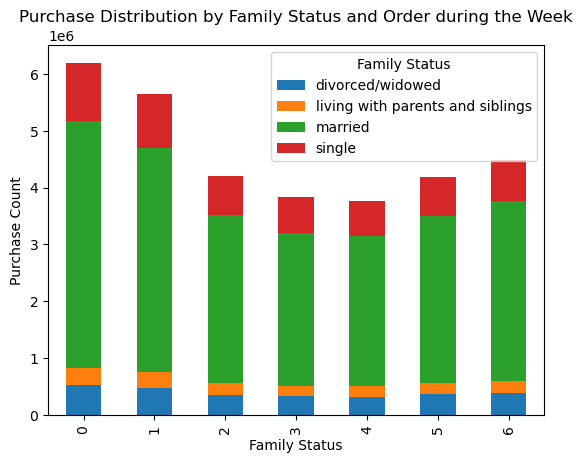

In [665]:
# Calculate counts of purchases for each combination of Family Status and Busiest day of the Week
fam_status_order_during_the_week = df_final_table.groupby(['order_day_of_week','fam_status']).size().unstack(fill_value=0)

# Create a bar chart
fig, ax = plt.subplots() # create a figure
fam_status_order_during_the_week.plot(kind='bar', stacked=True, ax=ax)

# Add labels and title
ax.set_xlabel('Family Status')
ax.set_ylabel('Purchase Count')
ax.set_title('Purchase Distribution by Family Status and Order during the Week')


# Adjust the placement of the legend
plt.legend(title='Family Status', loc='upper right')

# Export the bar chart
fig.figure.savefig(os.path.join(path_2,'Q3_fam_status_order_during_the_week_plot.png'))


In [666]:
fam_status_order_during_the_week_2 = df_final_table.groupby(['order_day_of_week','fam_status']).size()

In [667]:
fam_status_order_during_the_week_2.T.to_clipboard()

##### Purchase Distribution by Age Group and Order during the Week

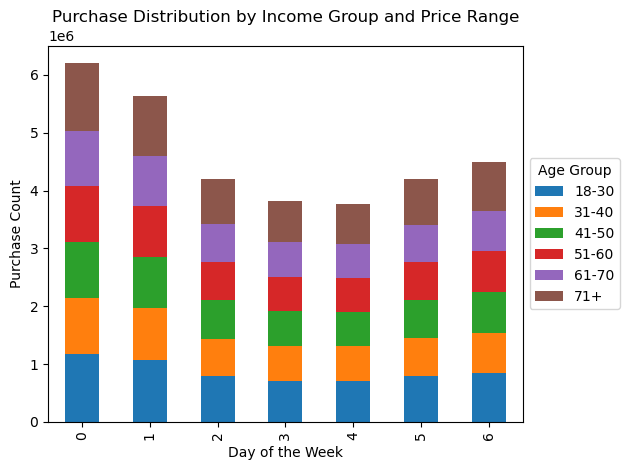

In [668]:
# Calculate counts of purchases for each combination of income group and age
purchase_counts_3 = df_final_table.groupby(['order_day_of_week','age_group_flag']).size().unstack(fill_value=0)

# Create a bar chart
fig, ax = plt.subplots()  # Create a Figure and an AxesSubplot
purchase_counts_3.plot(kind='bar', stacked=True, ax=ax)

# Add labels and title
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Purchase Count')
ax.set_title('Purchase Distribution by Income Group and Price Range')

# Display the legend
ax.legend(title='Age Group')
plt.legend(title='Age Group',loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()  # Improves spacing between elements
plt.savefig(output_filepath, bbox_inches='tight')  # Use "bbox_inches='tight'" to ensure everything is included
plt.show()  # Show the plot


# Export the bar chart
file_path = os.path.join(path_2, 'Q1_age_group_order_during_the_week_plot.png')  # Use a specific file format, e.g., PNG
fig.savefig(file_path)

In [669]:
# create a tabel for excel
purchase_counts = df_final_table.groupby(['order_day_of_week','age_group_flag']).size()

In [670]:
purchase_counts.to_clipboard()

##### Purchase Distribution by Family Status and Age Group

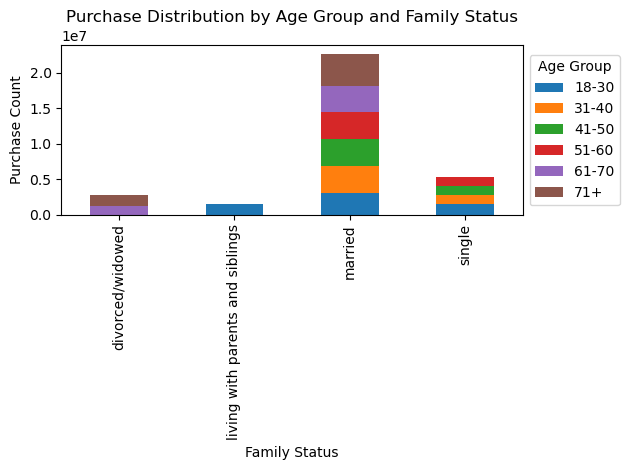

In [671]:
# Calculate counts of purchases for each combination of income group and age
purchase_counts_4 = df_final_table.groupby(['fam_status','age_group_flag']).size().unstack(fill_value=0)

# Create a bar chart
fig, ax = plt.subplots()  # Create a Figure and an AxesSubplot
purchase_counts_4.plot(kind='bar', stacked=True, ax=ax)

# Add labels and title
ax.set_xlabel('Family Status')
ax.set_ylabel('Purchase Count')
ax.set_title('Purchase Distribution by Age Group and Family Status')

# Display the legend
ax.legend(title='Age Group')
plt.legend(title='Age Group',loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()  # Improves spacing between elements
plt.savefig(output_filepath, bbox_inches='tight')  # Use "bbox_inches='tight'" to ensure everything is included
plt.show()  # Show the plot


# Export the bar chart
file_path = os.path.join(path_2, 'Q_age_group_fam_status.png')  # Use a specific file format, e.g., PNG
fig.savefig(file_path)

In [672]:
# Create an income flag for the three categories
df_final_table.loc[df_final_table['income'] < 35000, 'income_group'] = 'low_income'
df_final_table.loc[(df_final_table['income'] >= 35000) & (df_final_table['income'] < 150000), 'income_group'] = 'middle_income'
df_final_table.loc[df_final_table['income'] >= 150000, 'income_group'] = 'high_income'


In [673]:
df_final_table['income_group'].value_counts()

middle_income    27328450
high_income       4051607
low_income         938824
Name: income_group, dtype: int64

##### Income Group and Price Range

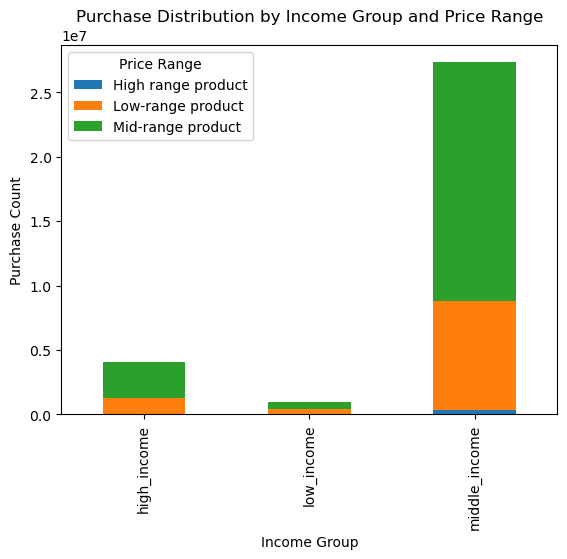

In [674]:
# Calculate counts of purchases for each combination of income group and price range
purchase_counts_5 = df_final_table.groupby(['income_group', 'price_range_flag']).size().unstack(fill_value=0)

# Create a bar chart
fig, ax = plt.subplots()  # Create a Figure and an AxesSubplot
purchase_counts_5.plot(kind='bar', stacked=True, ax=ax)

# Add labels and title
ax.set_xlabel('Income Group')
ax.set_ylabel('Purchase Count')
ax.set_title('Purchase Distribution by Income Group and Price Range')

# Display the legend
ax.legend(title='Price Range')
plt.savefig(output_filepath, bbox_inches='tight')


# Export the bar chart
file_path = os.path.join(path_2, 'price_range.png')  # Use a specific file format, e.g., PNG
fig.savefig(file_path)

##### Purchase Distribution by Income Group and Price Range

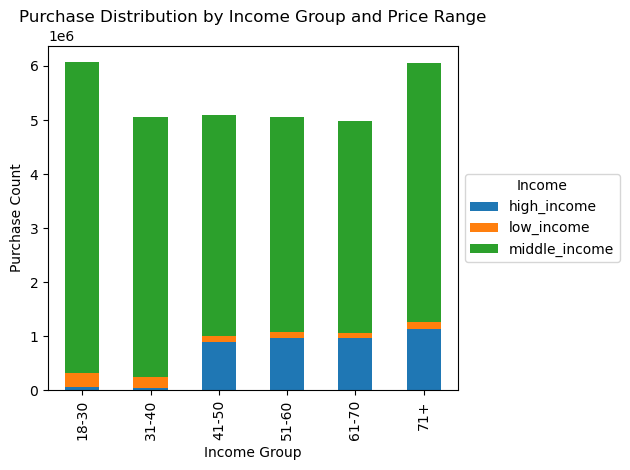

In [675]:
# Calculate counts of purchases for each combination of income group and age
purchase_counts_6 = df_final_table.groupby(['age_group_flag', 'income_group']).size().unstack(fill_value=0)

# Create a bar chart
fig, ax = plt.subplots()  # Create a Figure and an AxesSubplot
purchase_counts_6.plot(kind='bar', stacked=True, ax=ax)

# Add labels and title
ax.set_xlabel('Income Group')
ax.set_ylabel('Purchase Count')
ax.set_title('Purchase Distribution by Income Group and Price Range')

# Display the legend
ax.legend(title='Age')
plt.legend(title='Income',loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()  # Improves spacing between elements
plt.savefig(output_filepath, bbox_inches='tight')  # Use "bbox_inches='tight'" to ensure everything is included
plt.show()  # Show the plot


# Export the bar chart
file_path = os.path.join(path_2, 'Q_income_age_group.png')  # Use a specific file format, e.g., PNG
fig.savefig(file_path)

In [676]:
purchase_counts_7 = df_final_table.groupby(['age_group_flag', 'income_group']).size()

In [677]:
purchase_counts_7.to_clipboard()

##### Income Group and Reordered Products

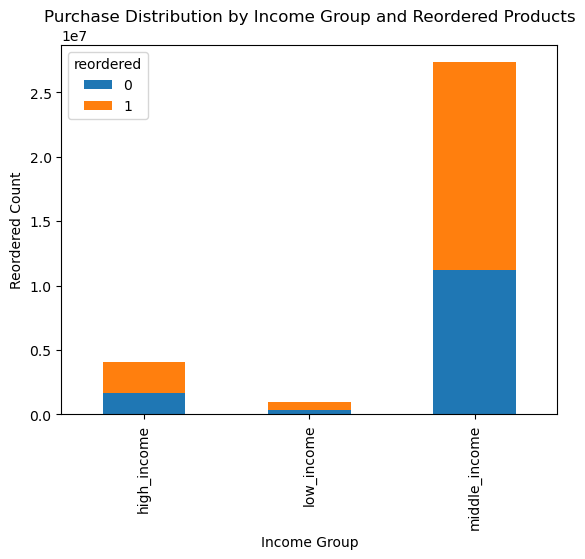

In [678]:
# Calculate counts of purchases for each combination of income group and price range
reordered_products_1 = df_final_table.groupby(['income_group', 'reordered']).size().unstack(fill_value=0)

# Create a bar chart
reordered_products_1.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Income Group')
plt.ylabel('Reordered Count')
plt.title('Purchase Distribution by Income Group and Reordered Products')

# Display the plot
plt.savefig(output_filepath, bbox_inches='tight')
plt.show()

# Export the bar chart
file_path = os.path.join(path_2, 'Q_income_gender.png')  # Use a specific file format, e.g., PNG
fig.savefig(file_path)

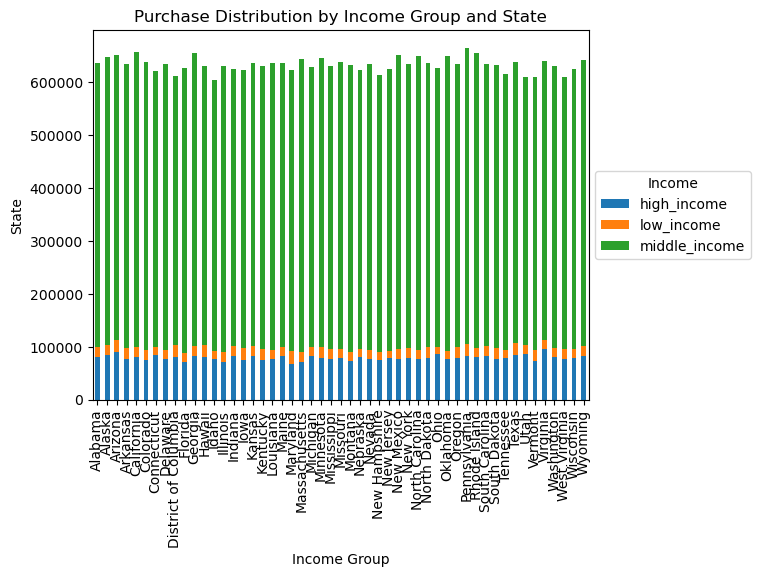

In [679]:
# Calculate counts of purchases for each combination of income group and price range
state_income_1 = df_final_table.groupby(['state','income_group']).size().unstack(fill_value=0)

# Create a bar chart
state_income_1.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Income Group')
plt.ylabel('State')
plt.title('Purchase Distribution by Income Group and State')

# Display the plot
plt.legend(title='income group')
plt.legend(title='Income',loc='center left', bbox_to_anchor=(1.0, 0.5))

# Export the bar chart
file_path = os.path.join(path_2, 'state_income.png')  # Use a specific file format, e.g., PNG
fig.savefig(file_path)

# Show the plot interactively
plt.show()

##### Income Group and order_day_of_week

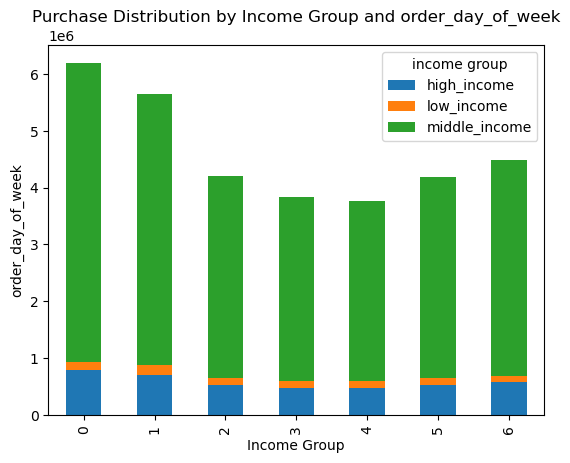

In [680]:
# Calculate counts of purchases for each combination of income group and order_day_of_week 
order_day_of_week_income_1 = df_final_table.groupby(['order_day_of_week','income_group']).size().unstack(fill_value=0)

# Create a bar chart
order_day_of_week_income_1.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Income Group')
plt.ylabel('order_day_of_week')
plt.title('Purchase Distribution by Income Group and order_day_of_week')

# Display the plot
plt.legend(title='income group', loc='upper right')
plt.show()

# Export the bar chart
file_path = os.path.join(path_2, 'order_day_of_week_income.png')  # Use a specific file format, e.g., PNG
fig.savefig(file_path)

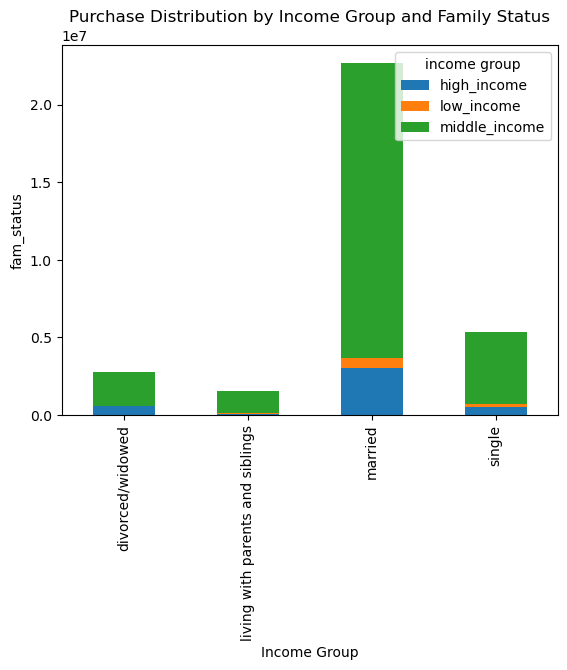

In [681]:
# Calculate counts of purchases for each combination of income group and Family Status
fam_status_income_2 = df_final_table.groupby(['fam_status','income_group']).size().unstack(fill_value=0)

# Create a bar chart
fam_status_income_2.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Income Group')
plt.ylabel('fam_status')
plt.title('Purchase Distribution by Income Group and Family Status')

# Display the plot
plt.legend(title='income group', loc='upper right')
plt.show()

# Export the bar chart
file_path = os.path.join(path_2, 'fam_status_income')  # Use a specific file format, e.g., PNG
fig.savefig(file_path)

##### Income Group and Busiest Period of Day

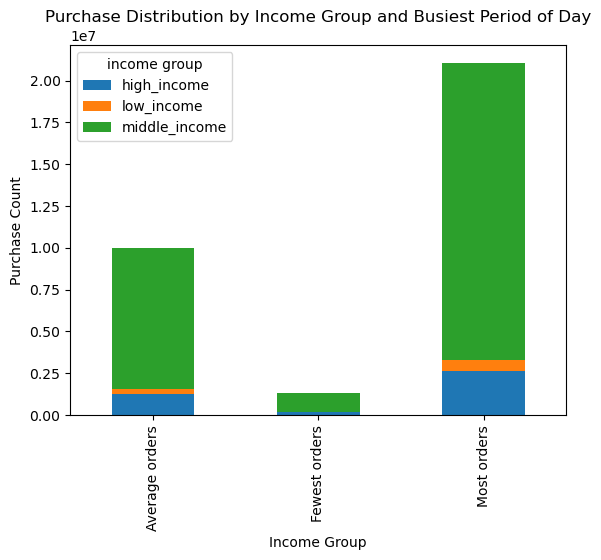

In [682]:
# Calculate counts of purchases for each combination of income group and Busiest Period of Day
busiest_period_of_day_income_3 = df_final_table.groupby(['busiest_period_of_day','income_group']).size().unstack(fill_value=0)

# Create a bar chart
busiest_period_of_day_income_3.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Income Group')
plt.ylabel('Purchase Count')
plt.title('Purchase Distribution by Income Group and Busiest Period of Day')

# Display the plot
plt.legend(title='income group')
plt.legend(title='income group', loc='upper left')
plt.show()

# Export the bar chart
file_path = os.path.join(path_2, 'busiest_period_of_day_income')  # Use a specific file format, e.g., PNG
fig.savefig(file_path)

##### Price_range and department

<Figure size 1000x600 with 0 Axes>

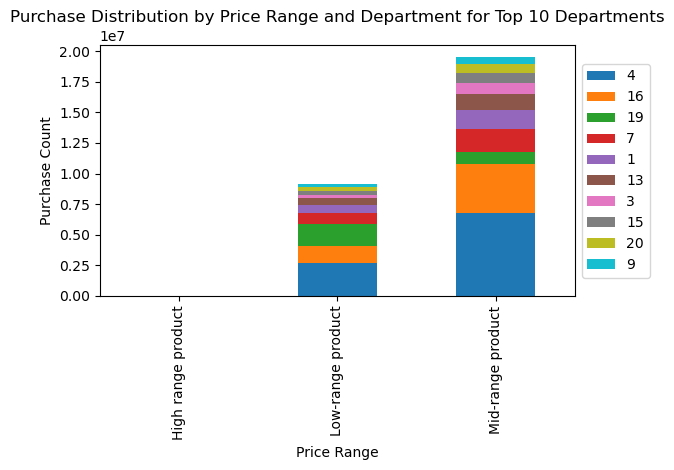

In [683]:
# Calculate counts of purchases for each combination of Price Range and Department
price_range_department = df_final_table.groupby(['price_range_flag', 'department_id']).size().unstack(fill_value=0)

# Calculate total purchase counts for each department
department_totals = price_range_department.sum()

# Find the departments with the highest purchase counts (exclude the lowest 10)
departments_to_plot = department_totals.nlargest(10).index

# Filter the data to include only the selected departments
filtered_data = price_range_department[departments_to_plot]

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

ax = filtered_data.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Price Range')
plt.ylabel('Purchase Count')
plt.title('Purchase Distribution by Price Range and Department for Top 10 Departments')

# Display the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title='Department')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Show the plot
plt.tight_layout()  # Improves spacing between elements
plt.show()

# Export the bar chart
file_path = os.path.join(path_2, 'price_range_department')  # Use a specific file format, e.g., PNG
fig.savefig(file_path)